# BC

In [47]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import math
import time
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from statistics import mean
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [48]:
#Loading datasets
df = pd.read_csv('breast-cancer-wisconsin-modified.csv')
df = df.drop(['id'],axis=1)

labelencoder_y = LabelEncoder()
df['Class'] = labelencoder_y.fit_transform(df['Class'])

df

df.Class.value_counts()

df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adheson               0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [41]:
df2 = df.copy()
df3 = df.copy()

In [23]:
len(df)

683

In [42]:
df, df2, df3 = shuffle(df, df2, df3)

In [15]:
df2 = df.sample(frac=1)

In [49]:
# X,y,etc should be the size which can be divided by n for n-fold cv. Some lows can be discarded. 
cv = 5
# s will be the size of the dataset <= original dataset size which can be divided by cv. 
s = math.floor(len(df)/cv)*cv
# d is the size of each partitioned dataset
d = int(s/cv)

X = df.iloc[:s,:-1].values
y = df.iloc[:s,-1].values
X_noise = df.iloc[:s,:-1].values.copy()

# 10 datasets which is going to be noised. 10%, 20% and so on. 
noise = []
n_range = range(0,10)
for n in n_range:
    noise.append(df.iloc[:s,:-1].values.copy())

[ 1  5  4  2  3  7 10  8  6]


9

In [50]:
# Make mean, std, max and min of every column
n_range = range(0, X.shape[1])
mean = []
std = []
max = []
min = []

for n in n_range: 
    mean.append(X_noise[:,n].mean())
    std.append(X_noise[:,n].std())
    max.append(X_noise[:,n].max())
    min.append(X_noise[:,n].min())

In [51]:
# New noise 

m_range = range(1,11)
for m in m_range:
    X_noise = noise[m-1]
    
    #noise_levels are going to be 0.1, 0.2,...1(10%,20%...)
    noise_level = 0.1 * m
    
    #How many entries(rows) in the dataset we want to add noise?
    noise_entries_amount = int(X.size * noise_level) 
    
    #Create an array with random int which represent the rows we are going to add noise on(no duplicate rows)
    r = np.random.choice(X.size, noise_entries_amount, replace=False)
    
    r_range = range(0,r.size)
    for n in r_range:
        entry = r[n]
        row = int(entry/X.shape[1])
        column = entry%X.shape[1]
        
        if column == 8:
            while True:
                a = np.random.randint(1, 11)
                if a != 9 and X_noise[row][column] != a:
                    X_noise[row][column] = a
                    break
        else: 
           while True:
                a = np.random.randint(1, 11)
                if X_noise[row][column] != a:
                    X_noise[row][column] = a
                    break 

In [69]:
linear_means_ac = []
poly_means_ac = []
rbf_means_ac = []
ann_means_ac = []
rf_means_ac = []

linear_means_f1 = []
poly_means_f1 = []
rbf_means_f1 = []
ann_means_f1 = []
rf_means_f1 = []

time_linear_sum_bc = []
time_poly_sum_bc = []
time_rbf_sum_bc = []
time_ann_sum_bc = []
time_rf_sum_bc = []


scores_linear_ac = [[],[],[],[],[],[],[],[],[],[],[]]
scores_poly_ac =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rbf_ac =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_ann_ac =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rf_ac =  [[],[],[],[],[],[],[],[],[],[],[]]

scores_linear_f1 =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_poly_f1 =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rbf_f1 =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_ann_f1 =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rf_f1 =  [[],[],[],[],[],[],[],[],[],[],[]]

time_linear_bc = [[],[],[],[],[],[],[],[],[],[],[]]
time_poly_bc = [[],[],[],[],[],[],[],[],[],[],[]]
time_rbf_bc = [[],[],[],[],[],[],[],[],[],[],[]]
time_ann_bc = [[],[],[],[],[],[],[],[],[],[],[]]
time_rf_bc = [[],[],[],[],[],[],[],[],[],[],[]]

In [71]:
for c in range(6):

    X,y,noise[0],noise[1],noise[2],noise[3],noise[4],noise[5],noise[6],noise[7],noise[8],noise[9] = shuffle(X,y,noise[0],noise[1],noise[2],noise[3],noise[4],noise[5],noise[6],noise[7],noise[8],noise[9])

    # p stands for partitioned
    X_p = []
    y_p = []
    # Each [] will contain noised dataset 10%, 20%... which are divided in cv(e.g. 5)
    noise_p = [[],[],[],[],[],[],[],[],[],[],]

    n_range = range(0,10)
    for n in n_range:
        for i in range(0, len(X), d):
                noise_p[n].append(noise[n][i:i + d])
    for i in range(0, len(X), d):
                X_p.append(X[i:i + d])
                y_p.append(y[i:i + d])


    # Cross Validation noise 0 
    from statistics import mean
    first = False

    for i in range(cv):
        start = time.time()
        X_test = X_p[i]
        y_test = y_p[i]
        first = True
        for k in range(cv):
            if k != i:
                if first != True:
                    X_train = np.append(X_train, X_p[k], axis=0)
                    y_train = np.append(y_train, y_p[k], axis=0)
                else: 
                    X_train = X_p[k]
                    y_train = y_p[k]
                    first = False


        # Now all test, train sets are obtained
        linear = svm.SVC(kernel='linear')
        poly = svm.SVC(kernel='poly')
        rbf = svm.SVC(kernel='rbf')
        ann = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
        rf = RandomForestClassifier(n_estimators=200)

        # Train the models
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        end = time.time()
        t = end-start

        linear_start = time.time()
        linear.fit(X_train, y_train)
        pred_linear = linear.predict(X_test)        
        score_linear_ac = accuracy_score(y_test, pred_linear)
        score_linear_f1 = f1_score(y_test, pred_linear)
        scores_linear_ac[0].append(score_linear_ac)
        scores_linear_f1[0].append(score_linear_f1)
        linear_end = time.time()
        time_linear_bc[0].append(t+(linear_end-linear_start))

        poly_start = time.time()
        poly.fit(X_train, y_train)
        pred_poly = poly.predict(X_test)        
        score_poly_ac = accuracy_score(y_test, pred_poly)
        score_poly_f1 = f1_score(y_test, pred_poly)
        scores_poly_ac[0].append(score_poly_ac)
        scores_poly_f1[0].append(score_poly_f1)
        poly_end = time.time()
        time_poly_bc[0].append(t+(poly_end-poly_start))

        rbf_start = time.time()
        rbf.fit(X_train, y_train)
        pred_rbf = rbf.predict(X_test)
        score_rbf_ac = accuracy_score(y_test, pred_rbf)
        scores_rbf_ac[0].append(score_rbf_ac)
        score_rbf_f1 = f1_score(y_test, pred_rbf)
        scores_rbf_f1[0].append(score_rbf_f1)
        rbf_end = time.time()
        time_rbf_bc[0].append(t+(rbf_end-rbf_start))

        ann_start = time.time()
        ann.fit(X_train, y_train)
        pred_ann = ann.predict(X_test)
        score_ann_ac = accuracy_score(y_test, pred_ann)
        scores_ann_ac[0].append(score_ann_ac)
        score_ann_f1 = f1_score(y_test, pred_ann)
        scores_ann_f1[0].append(score_ann_f1)
        ann_end = time.time()
        time_ann_bc[0].append(t+(ann_end-ann_start))

        rf_start = time.time()
        rf.fit(X_train, y_train)
        pred_rf = rf.predict(X_test)
        score_rf_ac = accuracy_score(y_test, pred_rf)
        scores_rf_ac[0].append(score_rf_ac)
        score_rf_f1 = f1_score(y_test, pred_rf)
        scores_rf_f1[0].append(score_rf_f1)
        rf_end = time.time()
        time_rf_bc[0].append(t+(rf_end-rf_start))

    # Cross Validation Linear
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False


            # Now all test, train sets are obtained
            linear = svm.SVC(kernel='linear')

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            linear.fit(X_train, y_train)
            pred_linear = linear.predict(X_test)        
            score_linear_ac = accuracy_score(y_test, pred_linear)
            score_linear_f1 = f1_score(y_test, pred_linear)

            scores_linear_ac[n+1].append(score_linear_ac)
            scores_linear_f1[n+1].append(score_linear_f1)
        end = time.time()
        t = end-start
        time_linear_bc[n+1].append(t)

    # Cross Validation Poly
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            poly = svm.SVC(kernel='poly')

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            poly.fit(X_train, y_train)
            pred_poly = poly.predict(X_test)        
            score_poly_ac = accuracy_score(y_test, pred_poly)
            score_poly_f1 = f1_score(y_test, pred_poly)

            scores_poly_ac[n+1].append(score_poly_ac)
            scores_poly_f1[n+1].append(score_poly_f1)
        end = time.time()
        t = end-start
        time_poly_bc[n+1].append(t)

    # Cross Validation Rbf
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            rbf = svm.SVC(kernel='rbf')

            # Train the models
            #Applying Standard scaling to get optimized result
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            rbf.fit(X_train, y_train)
            pred_rbf = rbf.predict(X_test)

            score_rbf_ac = accuracy_score(y_test, pred_rbf)
            score_rbf_f1 = f1_score(y_test, pred_rbf)

            scores_rbf_ac[n+1].append(score_rbf_ac)
            scores_rbf_f1[n+1].append(score_rbf_f1)
        end = time.time()
        t = end-start
        time_rbf_bc[n+1].append(t)

    # Cross Validation ANN
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            ann = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            ann.fit(X_train, y_train)
            pred_ann = ann.predict(X_test)

            score_ann_ac = accuracy_score(y_test, pred_ann)
            score_ann_f1 = f1_score(y_test, pred_ann)

            scores_ann_ac[n+1].append(score_ann_ac)
            scores_ann_f1[n+1].append(score_ann_f1)
        end = time.time()
        t = end-start
        time_ann_bc[n+1].append(t)

    # Cross Validation RF
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            rf = RandomForestClassifier(n_estimators=200)

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            rf.fit(X_train, y_train)
            pred_rf = rf.predict(X_test)

            score_rf_ac = accuracy_score(y_test, pred_rf)
            score_rf_f1 = f1_score(y_test, pred_rf)

            scores_rf_ac[n+1].append(score_rf_ac)
            scores_rf_f1[n+1].append(score_rf_f1)
        end = time.time()
        t = end-start
        time_rf_bc[n+1].append(t)

    

In [84]:
for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("Linear accuracy mean is: ", mean(scores_linear_ac[n]))
    print("Linear f1 mean is: ", mean(scores_linear_f1[n]))
    print("Linear time: ", sum(time_linear_bc[n]))

    print("")  
    linear_means_ac.append(mean(scores_linear_ac[n]))
    linear_means_f1.append(mean(scores_linear_f1[n]))
    time_linear_sum_bc.append(sum(time_linear_bc[n]))

for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("Poly accuracy mean is: ", mean(scores_poly_ac[n]))
    print("Poly f1 mean is: ", mean(scores_poly_f1[n]))
    print("Poly time: ", sum(time_poly_bc[n]))

    print("")  
    poly_means_ac.append(mean(scores_poly_ac[n]))
    poly_means_f1.append(mean(scores_poly_f1[n]))
    time_poly_sum_bc.append(sum(time_poly_bc[n]))

for n in range(11):  
    print("Noise level: " + str((n)*10) + '%')    
    print("Rbf accuracy mean is: ", mean(scores_rbf_ac[n]))
    print("Rbf f1 mean is: ", mean(scores_rbf_f1[n]))
    print("Rbf time: ", sum(time_rbf_bc[n]))

    print("")  
    rbf_means_ac.append(mean(scores_rbf_ac[n]))
    rbf_means_f1.append(mean(scores_rbf_f1[n]))
    time_rbf_sum_bc.append(sum(time_rbf_bc[n]))

for n in range(11):  
    print("Noise level: " + str((n)*10) + '%')    
    print("ANN accuracy mean is: ", mean(scores_ann_ac[n]))
    print("ANN f1 mean is: ", mean(scores_ann_f1[n]))
    print("Ann time: ", sum(time_ann_bc[n]))

    print("")  
    ann_means_ac.append(mean(scores_ann_ac[n]))
    ann_means_f1.append(mean(scores_ann_f1[n]))
    time_ann_sum_bc.append(sum(time_ann_bc[n]))

for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("RF accuracy mean is: ", mean(scores_rf_ac[n]))
    print("RF f1 mean is: ", mean(scores_rf_f1[n]))
    print("Rf time: ", sum(time_rf_bc[n]))

    print("")  
    rf_means_ac.append(mean(scores_rf_ac[n]))
    rf_means_f1.append(mean(scores_rf_f1[n]))
    time_rf_sum_bc.append(sum(time_rf_bc[n]))

Noise level: 0%
Linear accuracy mean is:  0.9660815939278937
Linear f1 mean is:  0.9510060982014662
Linear time:  0.17411112785339355

Noise level: 10%
Linear accuracy mean is:  0.9607843137254902
Linear f1 mean is:  0.9416840857287198
Linear time:  0.1699380874633789

Noise level: 20%
Linear accuracy mean is:  0.9512254901960784
Linear f1 mean is:  0.926089170851268
Linear time:  0.1866741180419922

Noise level: 30%
Linear accuracy mean is:  0.9448529411764706
Linear f1 mean is:  0.9153425849536796
Linear time:  0.23069262504577637

Noise level: 40%
Linear accuracy mean is:  0.9318627450980392
Linear f1 mean is:  0.8924111376710888
Linear time:  0.28866124153137207

Noise level: 50%
Linear accuracy mean is:  0.9321078431372549
Linear f1 mean is:  0.891292572477799
Linear time:  0.3516552448272705

Noise level: 60%
Linear accuracy mean is:  0.9002450980392157
Linear f1 mean is:  0.831563829578988
Linear time:  0.4341468811035156

Noise level: 70%
Linear accuracy mean is:  0.89068627450

In [141]:
# Make arrays with all the results [noise0, noise10%, noise20%..]
linear_result_ac_bc = linear_means_ac.copy()
poly_result_ac_bc = poly_means_ac.copy()
rbf_result_ac_bc = rbf_means_ac.copy()
ann_result_ac_bc = ann_means_ac.copy()
rf_result_ac_bc = rf_means_ac.copy()

linear_result_f1_bc = linear_means_f1.copy()
poly_result_f1_bc = poly_means_f1.copy()
rbf_result_f1_bc = rbf_means_f1.copy()
ann_result_f1_bc = ann_means_f1.copy()
rf_result_f1_bc = rf_means_f1.copy()
    
# Make ELA
linear_ela_result_bc = []
poly_ela_result_bc = []
rbf_ela_result_bc = []
ann_ela_result_bc = []
rf_ela_result_bc = []

linear_ela_bc = [[],[],[],[],[],[],[],[],[],[],[]]
poly_ela_bc = [[],[],[],[],[],[],[],[],[],[],[]]
rbf_ela_bc = [[],[],[],[],[],[],[],[],[],[],[]]
ann_ela_bc = [[],[],[],[],[],[],[],[],[],[],[]]
rf_ela_bc = [[],[],[],[],[],[],[],[],[],[],[]]

for i in range (0,11):
    for k in range (30):
        linear_ela_bc[i].append((100-100*scores_linear_ac[i][k])/(100*linear_means_ac[0]))
        poly_ela_bc[i].append((100-100*scores_poly_ac[i][k])/(100*poly_means_ac[0]))
        rbf_ela_bc[i].append((100-100*scores_rbf_ac[i][k])/(100*rbf_means_ac[0]))
        ann_ela_bc[i].append((100-100*scores_ann_ac[i][k])/(100*ann_means_ac[0]))
        rf_ela_bc[i].append((100-100*scores_rf_ac[i][k])/(100*rf_means_ac[0]))

    linear_ela_result_bc.append(mean(linear_ela_bc[i]))
    poly_ela_result_bc.append(mean(poly_ela_bc[i]))
    rbf_ela_result_bc.append(mean(rbf_ela_bc[i]))
    ann_ela_result_bc.append(mean(ann_ela_bc[i]))
    rf_ela_result_bc.append(mean(rf_ela_bc[i]))

In [154]:
#Confidence Interval 

cis_linear_ac = []
cis_poly_ac = []
cis_rbf_ac = []
cis_ann_ac = []
cis_rf_ac = []

cis_linear_f1 = []
cis_poly_f1 = []
cis_rbf_f1 = []
cis_ann_f1 = []
cis_rf_f1 = []

cis_linear_ela = []
cis_poly_ela = []
cis_rbf_ela = []
cis_ann_ela = []
cis_rf_ela = []

cis_linear_time = []
cis_poly_time = []
cis_rbf_time = []
cis_ann_time = []
cis_rf_time = []

#ac
for i in range(11):
    ci_std_linear = np.std(scores_linear_ac[i])
    ci_std_poly = np.std(scores_poly_ac[i])
    ci_std_rbf = np.std(scores_rbf_ac[i])
    ci_std_ann = np.std(scores_ann_ac[i])
    ci_std_rf = np.std(scores_rf_ac[i])
    
    cis_linear_ac.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_ac.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_ac.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_ac.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_ac.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_ac = np.add(linear_means_ac,cis_linear_ac)
ub_poly_ac = np.add(poly_means_ac,cis_poly_ac)
ub_rbf_ac = np.add(rbf_means_ac,cis_rbf_ac)
ub_ann_ac = np.add(ann_means_ac,cis_ann_ac)
ub_rf_ac = np.add(rf_means_ac,cis_rf_ac)
lb_linear_ac = np.subtract(linear_means_ac,cis_linear_ac)
lb_poly_ac = np.subtract(poly_means_ac,cis_poly_ac)
lb_rbf_ac = np.subtract(rbf_means_ac,cis_rbf_ac)
lb_ann_ac = np.subtract(ann_means_ac,cis_ann_ac)
lb_rf_ac = np.subtract(rf_means_ac,cis_rf_ac)

#f1
for i in range(11):
    ci_std_linear = np.std(scores_linear_f1[i])
    ci_std_poly = np.std(scores_poly_f1[i])
    ci_std_rbf = np.std(scores_rbf_f1[i])
    ci_std_ann = np.std(scores_ann_f1[i])
    ci_std_rf = np.std(scores_rf_f1[i])
    
    cis_linear_f1.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_f1.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_f1.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_f1.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_f1.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_f1 = np.add(linear_means_f1,cis_linear_f1)
ub_poly_f1 = np.add(poly_means_f1,cis_poly_f1)
ub_rbf_f1 = np.add(rbf_means_f1,cis_rbf_f1)
ub_ann_f1 = np.add(ann_means_f1,cis_ann_f1)
ub_rf_f1 = np.add(rf_means_f1,cis_rf_f1)
lb_linear_f1 = np.subtract(linear_means_f1,cis_linear_f1)
lb_poly_f1 = np.subtract(poly_means_f1,cis_poly_f1)
lb_rbf_f1 = np.subtract(rbf_means_f1,cis_rbf_f1)
lb_ann_f1 = np.subtract(ann_means_f1,cis_ann_f1)
lb_rf_f1 = np.subtract(rf_means_f1,cis_rf_f1)

#ELA
for i in range(11):
    ci_std_linear = np.std(linear_ela_bc[i])
    ci_std_poly = np.std(poly_ela_bc[i])
    ci_std_rbf = np.std(rbf_ela_bc[i])
    ci_std_ann = np.std(ann_ela_bc[i])
    ci_std_rf = np.std(rf_ela_bc[i])
    
    cis_linear_ela.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_ela.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_ela.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_ela.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_ela.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_ela = np.add(linear_ela_result_bc,cis_linear_ela)
ub_poly_ela = np.add(poly_ela_result_bc,cis_poly_ela)
ub_rbf_ela = np.add(rbf_ela_result_bc,cis_rbf_ela)
ub_ann_ela = np.add(ann_ela_result_bc,cis_ann_ela)
ub_rf_ela = np.add(rf_ela_result_bc,cis_rf_ela)
lb_linear_ela = np.subtract(linear_ela_result_bc,cis_linear_ela)
lb_poly_ela = np.subtract(poly_ela_result_bc,cis_poly_ela)
lb_rbf_ela = np.subtract(rbf_ela_result_bc,cis_rbf_ela)
lb_ann_ela = np.subtract(ann_ela_result_bc,cis_ann_ela)
lb_rf_ela = np.subtract(rf_ela_result_bc,cis_rf_ela)

#Time
for i in range(11):
    ci_std_linear = np.std(time_linear_bc[i])
    ci_std_poly = np.std(time_poly_bc[i])
    ci_std_rbf = np.std(time_rbf_bc[i])
    ci_std_ann = np.std(time_ann_bc[i])
    ci_std_rf = np.std(time_rf_bc[i])
    
    cis_linear_time.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_time.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_time.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_time.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_time.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_time = np.add(time_linear_sum_bc,cis_linear_time)
ub_poly_time = np.add(time_poly_sum_bc,cis_poly_time)
ub_rbf_time = np.add(time_rbf_sum_bc,cis_rbf_time)
ub_ann_time = np.add(time_ann_sum_bc,cis_ann_time)
ub_rf_time = np.add(time_rf_sum_bc,cis_rf_time)
lb_linear_time = np.subtract(time_linear_sum_bc,cis_linear_time)
lb_poly_time = np.subtract(time_poly_sum_bc,cis_poly_time)
lb_rbf_time = np.subtract(time_rbf_sum_bc,cis_rbf_time)
lb_ann_time = np.subtract(time_ann_sum_bc,cis_ann_time)
lb_rf_time = np.subtract(time_rf_sum_bc,cis_rf_time)
    
    

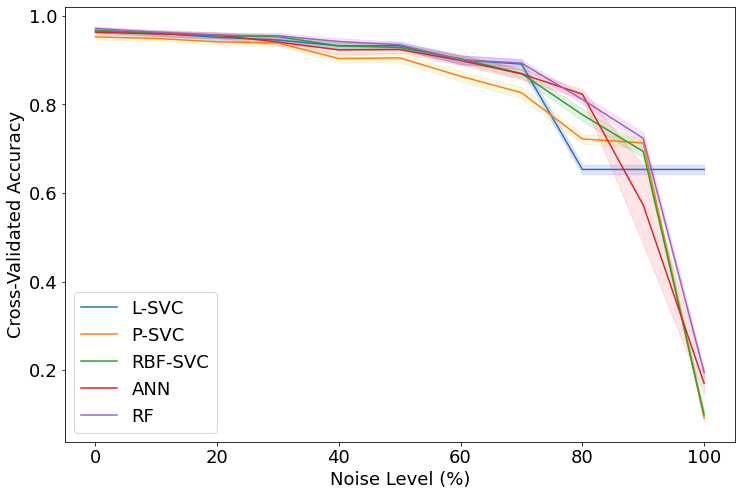

In [148]:
# Accuracy Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_result_ac_bc, label='L-SVC')
plt.fill_between(k_range, (ub_linear_ac), (lb_linear_ac), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, poly_result_ac_bc, label='P-SVC')
plt.fill_between(k_range, (ub_poly_ac), (lb_poly_ac), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, rbf_result_ac_bc, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_ac), (lb_rbf_ac), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, ann_result_ac_bc, label='ANN')
plt.fill_between(k_range, (ub_ann_ac), (lb_ann_ac), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, rf_result_ac_bc, label='RF')
plt.fill_between(k_range, (ub_rf_ac), (lb_rf_ac), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.legend()

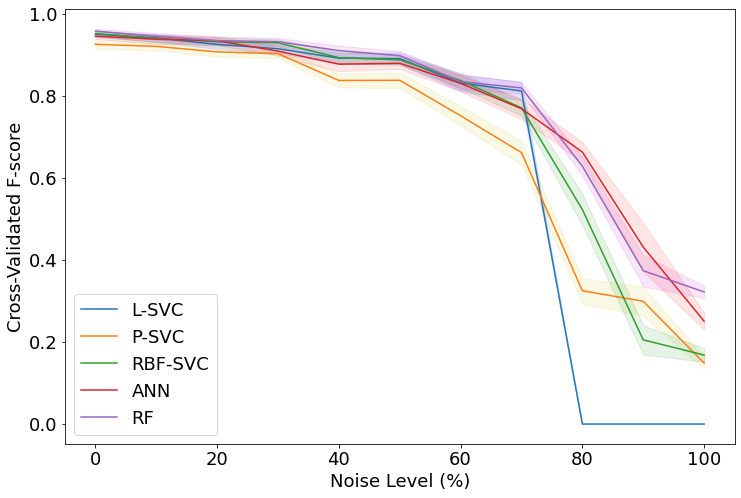

In [149]:
# F-score Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_result_f1_bc, label='L-SVC')
plt.fill_between(k_range, (ub_linear_f1), (lb_linear_f1), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, poly_result_f1_bc, label='P-SVC')
plt.fill_between(k_range, (ub_poly_f1), (lb_poly_f1), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, rbf_result_f1_bc, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_f1), (lb_rbf_f1), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, ann_result_f1_bc, label='ANN')
plt.fill_between(k_range, (ub_ann_f1), (lb_ann_f1), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, rf_result_f1_bc, label='RF')
plt.fill_between(k_range, (ub_rf_f1), (lb_rf_f1), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.legend()

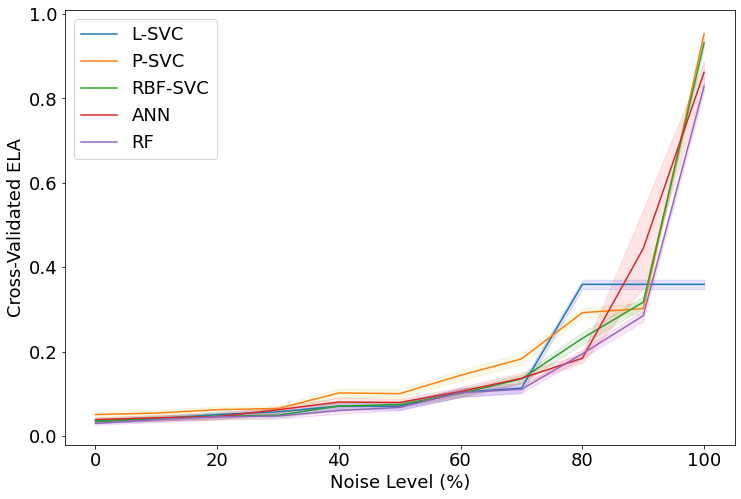

In [150]:
# ELA Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_ela_result_bc, label='L-SVC')
plt.fill_between(k_range, (ub_linear_ela), (lb_linear_ela), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, poly_ela_result_bc, label='P-SVC')
plt.fill_between(k_range, (ub_poly_ela), (lb_poly_ela), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, rbf_ela_result_bc, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_ela), (lb_rbf_ela), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, ann_ela_result_bc, label='ANN')
plt.fill_between(k_range, (ub_ann_ela), (lb_ann_ela), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, rf_ela_result_bc, label='RF')
plt.fill_between(k_range, (ub_rf_ela), (lb_rf_ela), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.legend()

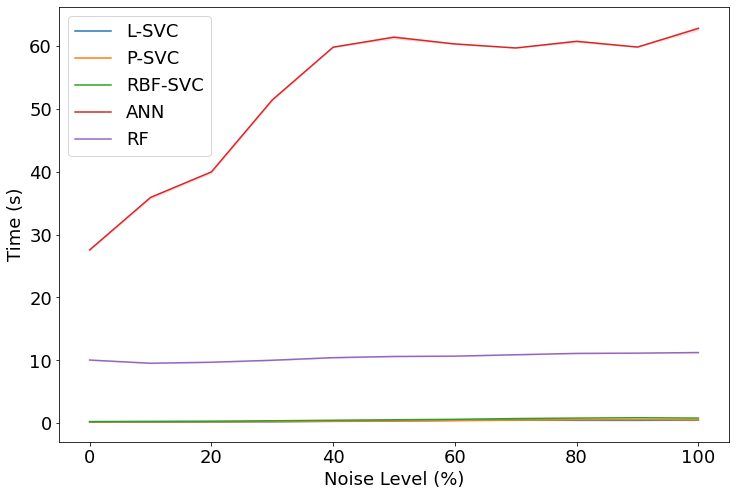

In [155]:
# Time Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, time_linear_sum_bc, label='L-SVC')
plt.fill_between(k_range, (ub_linear_time), (lb_linear_time), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_poly_sum_bc, label='P-SVC')
plt.fill_between(k_range, (ub_poly_time), (lb_poly_time), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_rbf_sum_bc, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_time), (lb_rbf_time), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_ann_sum_bc, label='ANN')
plt.fill_between(k_range, (ub_ann_time), (lb_ann_time), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_rf_sum_bc, label='RF')
plt.fill_between(k_range, (ub_rf_time), (lb_rf_time), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.legend()

In [213]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Accuracy  ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_result_ac_bc[0],3),round(poly_result_ac_bc[0],3),round(rbf_result_ac_bc[0],3),round(ann_result_ac_bc[0],3),round(rf_result_ac_bc[0],3)],
                       [round(linear_result_ac_bc[1],3),round(poly_result_ac_bc[1],3),round(rbf_result_ac_bc[1],3),round(ann_result_ac_bc[1],3),round(rf_result_ac_bc[1],3)],
                       [round(linear_result_ac_bc[2],3),round(poly_result_ac_bc[2],3),round(rbf_result_ac_bc[2],3),round(ann_result_ac_bc[2],3),round(rf_result_ac_bc[2],3)],
                       [round(linear_result_ac_bc[3],3),round(poly_result_ac_bc[3],3),round(rbf_result_ac_bc[3],3),round(ann_result_ac_bc[3],3),round(rf_result_ac_bc[3],3)],
                       [round(linear_result_ac_bc[4],3),round(poly_result_ac_bc[4],3),round(rbf_result_ac_bc[4],3),round(ann_result_ac_bc[4],3),round(rf_result_ac_bc[4],3)],
                       [round(linear_result_ac_bc[5],3),round(poly_result_ac_bc[5],3),round(rbf_result_ac_bc[5],3),round(ann_result_ac_bc[5],3),round(rf_result_ac_bc[5],3)],
                       [round(linear_result_ac_bc[6],3),round(poly_result_ac_bc[6],3),round(rbf_result_ac_bc[6],3),round(ann_result_ac_bc[6],3),round(rf_result_ac_bc[6],3)],
                       [round(linear_result_ac_bc[7],3),round(poly_result_ac_bc[7],3),round(rbf_result_ac_bc[7],3),round(ann_result_ac_bc[7],3),round(rf_result_ac_bc[7],3)],
                       [round(linear_result_ac_bc[8],3),round(poly_result_ac_bc[8],3),round(rbf_result_ac_bc[8],3),round(ann_result_ac_bc[8],3),round(rf_result_ac_bc[8],3)],
                       [round(linear_result_ac_bc[9],3),round(poly_result_ac_bc[9],3),round(rbf_result_ac_bc[9],3),round(ann_result_ac_bc[9],3),round(rf_result_ac_bc[9],3)],
                       [round(linear_result_ac_bc[10],3),round(poly_result_ac_bc[10],3),round(rbf_result_ac_bc[10],3),round(ann_result_ac_bc[10],3),round(rf_result_ac_bc[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['F-score ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_result_f1_bc[0],3),round(poly_result_f1_bc[0],3),round(rbf_result_f1_bc[0],3),round(ann_result_f1_bc[0],3),round(rf_result_f1_bc[0],3)],
                       [round(linear_result_f1_bc[1],3),round(poly_result_f1_bc[1],3),round(rbf_result_f1_bc[1],3),round(ann_result_f1_bc[1],3),round(rf_result_f1_bc[1],3)],
                       [round(linear_result_f1_bc[2],3),round(poly_result_f1_bc[2],3),round(rbf_result_f1_bc[2],3),round(ann_result_f1_bc[2],3),round(rf_result_f1_bc[2],3)],
                       [round(linear_result_f1_bc[3],3),round(poly_result_f1_bc[3],3),round(rbf_result_f1_bc[3],3),round(ann_result_f1_bc[3],3),round(rf_result_f1_bc[3],3)],
                       [round(linear_result_f1_bc[4],3),round(poly_result_f1_bc[4],3),round(rbf_result_f1_bc[4],3),round(ann_result_f1_bc[4],3),round(rf_result_f1_bc[4],3)],
                       [round(linear_result_f1_bc[5],3),round(poly_result_f1_bc[5],3),round(rbf_result_f1_bc[5],3),round(ann_result_f1_bc[5],3),round(rf_result_f1_bc[5],3)],
                       [round(linear_result_f1_bc[6],3),round(poly_result_f1_bc[6],3),round(rbf_result_f1_bc[6],3),round(ann_result_f1_bc[6],3),round(rf_result_f1_bc[6],3)],
                       [round(linear_result_f1_bc[7],3),round(poly_result_f1_bc[7],3),round(rbf_result_f1_bc[7],3),round(ann_result_f1_bc[7],3),round(rf_result_f1_bc[7],3)],
                       [round(linear_result_f1_bc[8],3),round(poly_result_f1_bc[8],3),round(rbf_result_f1_bc[8],3),round(ann_result_f1_bc[8],3),round(rf_result_f1_bc[8],3)],
                       [round(linear_result_f1_bc[9],3),round(poly_result_f1_bc[9],3),round(rbf_result_f1_bc[9],3),round(ann_result_f1_bc[9],3),round(rf_result_f1_bc[9],3)],
                       [round(linear_result_f1_bc[10],3),round(poly_result_f1_bc[10],3),round(rbf_result_f1_bc[10],3),round(ann_result_f1_bc[10],3),round(rf_result_f1_bc[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['ELA ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_ela_result_bc[0],3),round(poly_ela_result_bc[0],3),round(rbf_ela_result_bc[0],3),round(ann_ela_result_bc[0],3),round(rf_ela_result_bc[0],3)],
                       [round(linear_ela_result_bc[1],3),round(poly_ela_result_bc[1],3),round(rbf_ela_result_bc[1],3),round(ann_ela_result_bc[1],3),round(rf_ela_result_bc[1],3)],
                       [round(linear_ela_result_bc[2],3),round(poly_ela_result_bc[2],3),round(rbf_ela_result_bc[2],3),round(ann_ela_result_bc[2],3),round(rf_ela_result_bc[2],3)],
                       [round(linear_ela_result_bc[3],3),round(poly_ela_result_bc[3],3),round(rbf_ela_result_bc[3],3),round(ann_ela_result_bc[3],3),round(rf_ela_result_bc[3],3)],
                       [round(linear_ela_result_bc[4],3),round(poly_ela_result_bc[4],3),round(rbf_ela_result_bc[4],3),round(ann_ela_result_bc[4],3),round(rf_ela_result_bc[4],3)],
                       [round(linear_ela_result_bc[5],3),round(poly_ela_result_bc[5],3),round(rbf_ela_result_bc[5],3),round(ann_ela_result_bc[5],3),round(rf_ela_result_bc[5],3)],
                       [round(linear_ela_result_bc[6],3),round(poly_ela_result_bc[6],3),round(rbf_ela_result_bc[6],3),round(ann_ela_result_bc[6],3),round(rf_ela_result_bc[6],3)],
                       [round(linear_ela_result_bc[7],3),round(poly_ela_result_bc[7],3),round(rbf_ela_result_bc[7],3),round(ann_ela_result_bc[7],3),round(rf_ela_result_bc[7],3)],
                       [round(linear_ela_result_bc[8],3),round(poly_ela_result_bc[8],3),round(rbf_ela_result_bc[8],3),round(ann_ela_result_bc[8],3),round(rf_ela_result_bc[8],3)],
                       [round(linear_ela_result_bc[9],3),round(poly_ela_result_bc[9],3),round(rbf_ela_result_bc[9],3),round(ann_ela_result_bc[9],3),round(rf_ela_result_bc[9],3)],
                       [round(linear_ela_result_bc[10],3),round(poly_ela_result_bc[10],3),round(rbf_ela_result_bc[10],3),round(ann_ela_result_bc[10],3),round(rf_ela_result_bc[10],3)]
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Time (s)',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(time_linear_sum_bc[0],3),round(time_poly_sum_bc[0],3),round(time_rbf_sum_bc[0],3),round(time_ann_sum_bc[0],3),round(time_rf_sum_bc[0],3)],
                       [round(time_linear_sum_bc[1],3),round(time_poly_sum_bc[1],3),round(time_rbf_sum_bc[1],3),round(time_ann_sum_bc[1],3),round(time_rf_sum_bc[1],3)],
                       [round(time_linear_sum_bc[2],3),round(time_poly_sum_bc[2],3),round(time_rbf_sum_bc[2],3),round(time_ann_sum_bc[2],3),round(time_rf_sum_bc[2],3)],
                       [round(time_linear_sum_bc[3],3),round(time_poly_sum_bc[3],3),round(time_rbf_sum_bc[3],3),round(time_ann_sum_bc[3],3),round(time_rf_sum_bc[3],3)],
                       [round(time_linear_sum_bc[4],3),round(time_poly_sum_bc[4],3),round(time_rbf_sum_bc[4],3),round(time_ann_sum_bc[4],3),round(time_rf_sum_bc[4],3)],
                       [round(time_linear_sum_bc[5],3),round(time_poly_sum_bc[5],3),round(time_rbf_sum_bc[5],3),round(time_ann_sum_bc[5],3),round(time_rf_sum_bc[5],3)],
                       [round(time_linear_sum_bc[6],3),round(time_poly_sum_bc[6],3),round(time_rbf_sum_bc[6],3),round(time_ann_sum_bc[6],3),round(time_rf_sum_bc[6],3)],
                       [round(time_linear_sum_bc[7],3),round(time_poly_sum_bc[7],3),round(time_rbf_sum_bc[7],3),round(time_ann_sum_bc[7],3),round(time_rf_sum_bc[7],3)],
                       [round(time_linear_sum_bc[8],3),round(time_poly_sum_bc[8],3),round(time_rbf_sum_bc[8],3),round(time_ann_sum_bc[8],3),round(time_rf_sum_bc[8],3)],
                       [round(time_linear_sum_bc[9],3),round(time_poly_sum_bc[9],3),round(time_rbf_sum_bc[9],3),round(time_ann_sum_bc[9],3),round(time_rf_sum_bc[9],3)],
                       [round(time_linear_sum_bc[10],3),round(time_poly_sum_bc[10],3),round(time_rbf_sum_bc[10],3),round(time_ann_sum_bc[10],3),round(time_rf_sum_bc[10],3)]
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Classifier','Total Time (s)'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(sum(time_linear_sum_bc),3),round(sum(time_poly_sum_bc),3),round(sum(time_rbf_sum_bc),3),round(sum(time_ann_sum_bc),3),round(sum(time_rf_sum_bc),3)],
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

# Banknote

In [167]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import math
import time
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from statistics import mean
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Loading datasets
df = pd.read_csv('data_banknote_authentication.csv')
# csv file is modified before loadning

df

# How does the proportion of the Target values look like?
df.banknote.value_counts()

# X,y,etc should be the size which can be divided by n for n-fold cv. Some lows can be discarded. 
cv = 5
# s will be the length of the dataset <= length which can be divided by cv. 
s = math.floor(len(df)/cv)*cv
# d is the size of each partitioned dataset
d = int(s/cv)

X = df.iloc[:s,:-1].values
y = df.iloc[:s,-1].values
X_noise = df.iloc[:s,:-1].values.copy()

# 10 datasets which is going to be noised. 10%, 20% and so on. 
noise = []
n_range = range(0,10)
for n in n_range:
    noise.append(df.iloc[:s,:-1].values.copy())

# Make mean, std, max and min of every column
n_range = range(0, X.shape[1])
mean = []
std = []
max = []
min = []

for n in n_range: 
    mean.append(X_noise[:,n].mean())
    std.append(X_noise[:,n].std())
    max.append(X_noise[:,n].max())
    min.append(X_noise[:,n].min())

# New noise 

m_range = range(1,11)
for m in m_range:
    X_noise = noise[m-1]
    
    #noise_levels are going to be 0.1, 0.2,...1(10%,20%...)
    noise_level = 0.1 * m
    
    #How many entries(rows) in the dataset we want to add noise?
    noise_entries_amount = int(X.size * noise_level) 
    
    #Create an array with random int which represent the rows we are going to add noise on(no duplicate rows)
    r = np.random.choice(X.size, noise_entries_amount, replace=False)
    
    r_range = range(0,r.size)
    for n in r_range:
        entry = r[n]
        row = int(entry/X.shape[1])
        column = entry%X.shape[1]
                
        g_noise = np.random.normal(mean[column], std[column])
        # if the gaussian noise is greater than the max value of the column, we take the max value as noise. 
        if g_noise > max[column]:
            g_noise = max[column]
            X_noise[row][column] = X_noise[row][column] + g_noise
        # if the gaussian noise is smaller than the min value of the column, we take the min value as noise. 
        elif g_noise < 0:
            g_noise = min[column]
            X_noise[row][column] = X_noise[row][column] + g_noise
        else: 
            X_noise[row][column] = X_noise[row][column] + g_noise


X

noise[0]

noise[9]

array([[  8.22810949,   9.41689195,  -8.0934    ,  -8.99519   ],
       [  7.97294248,  -5.6057    ,   5.0107772 ,  -0.97587774],
       [  6.01034684,  -0.90562368,   8.8508835 ,  -8.44175   ],
       ...,
       [  2.15908772, -12.4239    ,  -6.7362    ,   1.37227099],
       [ -8.4308    , -18.6504    ,   6.54015248,  -8.20641   ],
       [ -1.39517701, -10.96617401,  20.28618867, -11.3253    ]])

In [168]:
linear_means_ac_banknote = []
poly_means_ac_banknote = []
rbf_means_ac_banknote = []
ann_means_ac_banknote = []
rf_means_ac_banknote = []

linear_means_f1_banknote = []
poly_means_f1_banknote = []
rbf_means_f1_banknote = []
ann_means_f1_banknote = []
rf_means_f1_banknote = []

time_linear_sum_banknote = []
time_poly_sum_banknote = []
time_rbf_sum_banknote = []
time_ann_sum_banknote = []
time_rf_sum_banknote = []


scores_linear_ac_banknote = [[],[],[],[],[],[],[],[],[],[],[]]
scores_poly_ac_banknote =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rbf_ac_banknote =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_ann_ac_banknote =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rf_ac_banknote =  [[],[],[],[],[],[],[],[],[],[],[]]

scores_linear_f1_banknote =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_poly_f1_banknote =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rbf_f1_banknote =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_ann_f1_banknote =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rf_f1_banknote =  [[],[],[],[],[],[],[],[],[],[],[]]

time_linear_banknote = [[],[],[],[],[],[],[],[],[],[],[]]
time_poly_banknote = [[],[],[],[],[],[],[],[],[],[],[]]
time_rbf_banknote = [[],[],[],[],[],[],[],[],[],[],[]]
time_ann_banknote = [[],[],[],[],[],[],[],[],[],[],[]]
time_rf_banknote = [[],[],[],[],[],[],[],[],[],[],[]]

In [169]:
for c in range(6):

    X,y,noise[0],noise[1],noise[2],noise[3],noise[4],noise[5],noise[6],noise[7],noise[8],noise[9] = shuffle(X,y,noise[0],noise[1],noise[2],noise[3],noise[4],noise[5],noise[6],noise[7],noise[8],noise[9])

    # p stands for partitioned
    X_p = []
    y_p = []
    # Each [] will contain noised dataset 10%, 20%... which are divided in cv(e.g. 5)
    noise_p = [[],[],[],[],[],[],[],[],[],[],]

    n_range = range(0,10)
    for n in n_range:
        for i in range(0, len(X), d):
                noise_p[n].append(noise[n][i:i + d])
    for i in range(0, len(X), d):
                X_p.append(X[i:i + d])
                y_p.append(y[i:i + d])


    # Cross Validation noise 0 
    from statistics import mean
    first = False

    for i in range(cv):
        start = time.time()
        X_test = X_p[i]
        y_test = y_p[i]
        first = True
        for k in range(cv):
            if k != i:
                if first != True:
                    X_train = np.append(X_train, X_p[k], axis=0)
                    y_train = np.append(y_train, y_p[k], axis=0)
                else: 
                    X_train = X_p[k]
                    y_train = y_p[k]
                    first = False


        # Now all test, train sets are obtained
        linear = svm.SVC(kernel='linear')
        poly = svm.SVC(kernel='poly')
        rbf = svm.SVC(kernel='rbf')
        ann = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
        rf = RandomForestClassifier(n_estimators=200)

        # Train the models
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        end = time.time()
        t = end-start

        linear_start = time.time()
        linear.fit(X_train, y_train)
        pred_linear = linear.predict(X_test)        
        score_linear_ac = accuracy_score(y_test, pred_linear)
        score_linear_f1 = f1_score(y_test, pred_linear)
        scores_linear_ac_banknote[0].append(score_linear_ac)
        scores_linear_f1_banknote[0].append(score_linear_f1)
        linear_end = time.time()
        time_linear_banknote[0].append(t+(linear_end-linear_start))

        poly_start = time.time()
        poly.fit(X_train, y_train)
        pred_poly = poly.predict(X_test)        
        score_poly_ac = accuracy_score(y_test, pred_poly)
        score_poly_f1 = f1_score(y_test, pred_poly)
        scores_poly_ac_banknote[0].append(score_poly_ac)
        scores_poly_f1_banknote[0].append(score_poly_f1)
        poly_end = time.time()
        time_poly_banknote[0].append(t+(poly_end-poly_start))

        rbf_start = time.time()
        rbf.fit(X_train, y_train)
        pred_rbf = rbf.predict(X_test)
        score_rbf_ac = accuracy_score(y_test, pred_rbf)
        scores_rbf_ac_banknote[0].append(score_rbf_ac)
        score_rbf_f1 = f1_score(y_test, pred_rbf)
        scores_rbf_f1_banknote[0].append(score_rbf_f1)
        rbf_end = time.time()
        time_rbf_banknote[0].append(t+(rbf_end-rbf_start))

        ann_start = time.time()
        ann.fit(X_train, y_train)
        pred_ann = ann.predict(X_test)
        score_ann_ac = accuracy_score(y_test, pred_ann)
        scores_ann_ac_banknote[0].append(score_ann_ac)
        score_ann_f1 = f1_score(y_test, pred_ann)
        scores_ann_f1_banknote[0].append(score_ann_f1)
        ann_end = time.time()
        time_ann_banknote[0].append(t+(ann_end-ann_start))

        rf_start = time.time()
        rf.fit(X_train, y_train)
        pred_rf = rf.predict(X_test)
        score_rf_ac = accuracy_score(y_test, pred_rf)
        scores_rf_ac_banknote[0].append(score_rf_ac)
        score_rf_f1 = f1_score(y_test, pred_rf)
        scores_rf_f1_banknote[0].append(score_rf_f1)
        rf_end = time.time()
        time_rf_banknote[0].append(t+(rf_end-rf_start))

    # Cross Validation Linear
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False


            # Now all test, train sets are obtained
            linear = svm.SVC(kernel='linear')

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            linear.fit(X_train, y_train)
            pred_linear = linear.predict(X_test)        
            score_linear_ac = accuracy_score(y_test, pred_linear)
            score_linear_f1 = f1_score(y_test, pred_linear)

            scores_linear_ac_banknote[n+1].append(score_linear_ac)
            scores_linear_f1_banknote[n+1].append(score_linear_f1)
        end = time.time()
        t = end-start
        time_linear_banknote[n+1].append(t)

    # Cross Validation Poly
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            poly = svm.SVC(kernel='poly')

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            poly.fit(X_train, y_train)
            pred_poly = poly.predict(X_test)        
            score_poly_ac = accuracy_score(y_test, pred_poly)
            score_poly_f1 = f1_score(y_test, pred_poly)

            scores_poly_ac_banknote[n+1].append(score_poly_ac)
            scores_poly_f1_banknote[n+1].append(score_poly_f1)
        end = time.time()
        t = end-start
        time_poly_banknote[n+1].append(t)

    # Cross Validation Rbf
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            rbf = svm.SVC(kernel='rbf')

            # Train the models
            #Applying Standard scaling to get optimized result
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            rbf.fit(X_train, y_train)
            pred_rbf = rbf.predict(X_test)

            score_rbf_ac = accuracy_score(y_test, pred_rbf)
            score_rbf_f1 = f1_score(y_test, pred_rbf)

            scores_rbf_ac_banknote[n+1].append(score_rbf_ac)
            scores_rbf_f1_banknote[n+1].append(score_rbf_f1)
        end = time.time()
        t = end-start
        time_rbf_banknote[n+1].append(t)

    # Cross Validation ANN
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            ann = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            ann.fit(X_train, y_train)
            pred_ann = ann.predict(X_test)

            score_ann_ac = accuracy_score(y_test, pred_ann)
            score_ann_f1 = f1_score(y_test, pred_ann)

            scores_ann_ac_banknote[n+1].append(score_ann_ac)
            scores_ann_f1_banknote[n+1].append(score_ann_f1)
        end = time.time()
        t = end-start
        time_ann_banknote[n+1].append(t)

    # Cross Validation RF
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            rf = RandomForestClassifier(n_estimators=200)

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            rf.fit(X_train, y_train)
            pred_rf = rf.predict(X_test)

            score_rf_ac = accuracy_score(y_test, pred_rf)
            score_rf_f1 = f1_score(y_test, pred_rf)

            scores_rf_ac_banknote[n+1].append(score_rf_ac)
            scores_rf_f1_banknote[n+1].append(score_rf_f1)
        end = time.time()
        t = end-start
        time_rf_banknote[n+1].append(t)

    

In [170]:
for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("Linear accuracy mean is: ", mean(scores_linear_ac_banknote[n]))
    print("Linear f1 mean is: ", mean(scores_linear_f1_banknote[n]))
    print("Linear time: ", sum(time_linear_banknote[n]))

    print("")  
    linear_means_ac_banknote.append(mean(scores_linear_ac_banknote[n]))
    linear_means_f1_banknote.append(mean(scores_linear_f1_banknote[n]))
    time_linear_sum_banknote.append(sum(time_linear_banknote[n]))

for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("Poly accuracy mean is: ", mean(scores_poly_ac_banknote[n]))
    print("Poly f1 mean is: ", mean(scores_poly_f1_banknote[n]))
    print("Poly time: ", sum(time_poly_banknote[n]))

    print("")  
    poly_means_ac_banknote.append(mean(scores_poly_ac_banknote[n]))
    poly_means_f1_banknote.append(mean(scores_poly_f1_banknote[n]))
    time_poly_sum_banknote.append(sum(time_poly_banknote[n]))

for n in range(11):  
    print("Noise level: " + str((n)*10) + '%')    
    print("Rbf accuracy mean is: ", mean(scores_rbf_ac_banknote[n]))
    print("Rbf f1 mean is: ", mean(scores_rbf_f1_banknote[n]))
    print("Rbf time: ", sum(time_rbf_banknote[n]))

    print("")  
    rbf_means_ac_banknote.append(mean(scores_rbf_ac_banknote[n]))
    rbf_means_f1_banknote.append(mean(scores_rbf_f1_banknote[n]))
    time_rbf_sum_banknote.append(sum(time_rbf_banknote[n]))

for n in range(11):  
    print("Noise level: " + str((n)*10) + '%')    
    print("ANN accuracy mean is: ", mean(scores_ann_ac_banknote[n]))
    print("ANN f1 mean is: ", mean(scores_ann_f1_banknote[n]))
    print("Ann time: ", sum(time_ann_banknote[n]))

    print("")  
    ann_means_ac_banknote.append(mean(scores_ann_ac_banknote[n]))
    ann_means_f1_banknote.append(mean(scores_ann_f1_banknote[n]))
    time_ann_sum_banknote.append(sum(time_ann_banknote[n]))

for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("RF accuracy mean is: ", mean(scores_rf_ac_banknote[n]))
    print("RF f1 mean is: ", mean(scores_rf_f1_banknote[n]))
    print("Rf time: ", sum(time_rf_banknote[n]))

    print("")  
    rf_means_ac_banknote.append(mean(scores_rf_ac_banknote[n]))
    rf_means_f1_banknote.append(mean(scores_rf_f1_banknote[n]))
    time_rf_sum_banknote.append(sum(time_rf_banknote[n]))

Noise level: 0%
Linear accuracy mean is:  0.9843065693430657
Linear f1 mean is:  0.9824543588861038
Linear time:  0.3223888874053955

Noise level: 10%
Linear accuracy mean is:  0.974330900243309
Linear f1 mean is:  0.9715869227984192
Linear time:  0.7716107368469238

Noise level: 20%
Linear accuracy mean is:  0.9624087591240876
Linear f1 mean is:  0.9578812815884545
Linear time:  1.1291415691375732

Noise level: 30%
Linear accuracy mean is:  0.9535279805352798
Linear f1 mean is:  0.9466468915557309
Linear time:  1.2412850856781006

Noise level: 40%
Linear accuracy mean is:  0.9177615571776155
Linear f1 mean is:  0.902090992443486
Linear time:  1.3483624458312988

Noise level: 50%
Linear accuracy mean is:  0.8351581508515815
Linear f1 mean is:  0.7737275283784584
Linear time:  1.3101716041564941

Noise level: 60%
Linear accuracy mean is:  0.795985401459854
Linear f1 mean is:  0.7011668828318525
Linear time:  1.4786393642425537

Noise level: 70%
Linear accuracy mean is:  0.81508515815085

In [176]:
# Make arrays with all the results [noise0, noise10%, noise20%..]
linear_result_ac_banknote = linear_means_ac_banknote.copy()
poly_result_ac_banknote = poly_means_ac_banknote.copy()
rbf_result_ac_banknote = rbf_means_ac_banknote.copy()
ann_result_ac_banknote = ann_means_ac_banknote.copy()
rf_result_ac_banknote = rf_means_ac_banknote.copy()

linear_result_f1_banknote = linear_means_f1_banknote.copy()
poly_result_f1_banknote = poly_means_f1_banknote.copy()
rbf_result_f1_banknote = rbf_means_f1_banknote.copy()
ann_result_f1_banknote = ann_means_f1_banknote.copy()
rf_result_f1_banknote = rf_means_f1_banknote.copy()
    
# Make ELA
linear_ela_result_banknote = []
poly_ela_result_banknote = []
rbf_ela_result_banknote = []
ann_ela_result_banknote = []
rf_ela_result_banknote = []

linear_ela_banknote = [[],[],[],[],[],[],[],[],[],[],[]]
poly_ela_banknote = [[],[],[],[],[],[],[],[],[],[],[]]
rbf_ela_banknote = [[],[],[],[],[],[],[],[],[],[],[]]
ann_ela_banknote = [[],[],[],[],[],[],[],[],[],[],[]]
rf_ela_banknote = [[],[],[],[],[],[],[],[],[],[],[]]

for i in range (0,11):
    for k in range (30):
        linear_ela_banknote[i].append((100-100*scores_linear_ac_banknote[i][k])/(100*linear_means_ac[0]))
        poly_ela_banknote[i].append((100-100*scores_poly_ac_banknote[i][k])/(100*poly_means_ac[0]))
        rbf_ela_banknote[i].append((100-100*scores_rbf_ac_banknote[i][k])/(100*rbf_means_ac[0]))
        ann_ela_banknote[i].append((100-100*scores_ann_ac_banknote[i][k])/(100*ann_means_ac[0]))
        rf_ela_banknote[i].append((100-100*scores_rf_ac_banknote[i][k])/(100*rf_means_ac[0]))

    linear_ela_result_banknote.append(mean(linear_ela_banknote[i]))
    poly_ela_result_banknote.append(mean(poly_ela_banknote[i]))
    rbf_ela_result_banknote.append(mean(rbf_ela_banknote[i]))
    ann_ela_result_banknote.append(mean(ann_ela_banknote[i]))
    rf_ela_result_banknote.append(mean(rf_ela_banknote[i]))

In [177]:
#Confidence Interval 

cis_linear_banknote = []
cis_poly_banknote = []
cis_rbf_banknote = []
cis_ann_banknote = []
cis_rf_banknote = []

cis_linear_f1_banknote = []
cis_poly_f1_banknote = []
cis_rbf_f1_banknote = []
cis_ann_f1_banknote = []
cis_rf_f1_banknote = []

cis_linear_ela = []
cis_poly_ela = []
cis_rbf_ela = []
cis_ann_ela = []
cis_rf_ela = []

cis_linear_time = []
cis_poly_time = []
cis_rbf_time = []
cis_ann_time = []
cis_rf_time = []

#ac
for i in range(11):
    ci_std_linear = np.std(scores_linear_ac_banknote[i])
    ci_std_poly = np.std(scores_poly_ac_banknote[i])
    ci_std_rbf = np.std(scores_rbf_ac_banknote[i])
    ci_std_ann = np.std(scores_ann_ac_banknote[i])
    ci_std_rf = np.std(scores_rf_ac_banknote[i])
    
    cis_linear_banknote.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_banknote.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_banknote.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_banknote.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_banknote.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_ac_banknote = np.add(linear_means_ac_banknote,cis_linear_banknote)
ub_poly_ac_banknote = np.add(poly_means_ac_banknote,cis_poly_banknote)
ub_rbf_ac_banknote = np.add(rbf_means_ac_banknote,cis_rbf_banknote)
ub_ann_ac_banknote = np.add(ann_means_ac_banknote,cis_ann_banknote)
ub_rf_ac_banknote = np.add(rf_means_ac_banknote,cis_rf_banknote)
lb_linear_ac_banknote = np.subtract(linear_means_ac_banknote,cis_linear_banknote)
lb_poly_ac_banknote = np.subtract(poly_means_ac_banknote,cis_poly_banknote)
lb_rbf_ac_banknote = np.subtract(rbf_means_ac_banknote,cis_rbf_banknote)
lb_ann_ac_banknote = np.subtract(ann_means_ac_banknote,cis_ann_banknote)
lb_rf_ac_banknote = np.subtract(rf_means_ac_banknote,cis_rf_banknote)

#f1
for i in range(11):
    ci_std_linear = np.std(scores_linear_f1_banknote[i])
    ci_std_poly = np.std(scores_poly_f1_banknote[i])
    ci_std_rbf = np.std(scores_rbf_f1_banknote[i])
    ci_std_ann = np.std(scores_ann_f1_banknote[i])
    ci_std_rf = np.std(scores_rf_f1_banknote[i])
    
    cis_linear_f1_banknote.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_f1_banknote.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_f1_banknote.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_f1_banknote.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_f1_banknote.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_f1_banknote = np.add(linear_means_f1_banknote,cis_linear_f1_banknote)
ub_poly_f1_banknote = np.add(poly_means_f1_banknote,cis_poly_f1_banknote)
ub_rbf_f1_banknote = np.add(rbf_means_f1_banknote,cis_rbf_f1_banknote)
ub_ann_f1_banknote = np.add(ann_means_f1_banknote,cis_ann_f1_banknote)
ub_rf_f1_banknote = np.add(rf_means_f1_banknote,cis_rf_f1_banknote)
lb_linear_f1_banknote = np.subtract(linear_means_f1_banknote,cis_linear_f1_banknote)
lb_poly_f1_banknote = np.subtract(poly_means_f1_banknote,cis_poly_f1_banknote)
lb_rbf_f1_banknote = np.subtract(rbf_means_f1_banknote,cis_rbf_f1_banknote)
lb_ann_f1_banknote = np.subtract(ann_means_f1_banknote,cis_ann_f1_banknote)
lb_rf_f1_banknote = np.subtract(rf_means_f1_banknote,cis_rf_f1_banknote)

#ELA
for i in range(11):
    ci_std_linear = np.std(linear_ela_banknote[i])
    ci_std_poly = np.std(poly_ela_banknote[i])
    ci_std_rbf = np.std(rbf_ela_banknote[i])
    ci_std_ann = np.std(ann_ela_banknote[i])
    ci_std_rf = np.std(rf_ela_banknote[i])
    
    cis_linear_ela.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_ela.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_ela.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_ela.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_ela.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_ela_banknote = np.add(linear_ela_result_banknote,cis_linear_ela)
ub_poly_ela_banknote = np.add(poly_ela_result_banknote,cis_poly_ela)
ub_rbf_ela_banknote = np.add(rbf_ela_result_banknote,cis_rbf_ela)
ub_ann_ela_banknote = np.add(ann_ela_result_banknote,cis_ann_ela)
ub_rf_ela_banknote = np.add(rf_ela_result_banknote,cis_rf_ela)
lb_linear_ela_banknote = np.subtract(linear_ela_result_banknote,cis_linear_ela)
lb_poly_ela_banknote = np.subtract(poly_ela_result_banknote,cis_poly_ela)
lb_rbf_ela_banknote = np.subtract(rbf_ela_result_banknote,cis_rbf_ela)
lb_ann_ela_banknote = np.subtract(ann_ela_result_banknote,cis_ann_ela)
lb_rf_ela_banknote = np.subtract(rf_ela_result_banknote,cis_rf_ela)

#Time
for i in range(11):
    ci_std_linear = np.std(time_linear_banknote[i])
    ci_std_poly = np.std(time_poly_banknote[i])
    ci_std_rbf = np.std(time_rbf_banknote[i])
    ci_std_ann = np.std(time_ann_banknote[i])
    ci_std_rf = np.std(time_rf_banknote[i])
    
    cis_linear_time.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_time.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_time.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_time.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_time.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_time_banknote = np.add(time_linear_sum_banknote,cis_linear_time)
ub_poly_time_banknote = np.add(time_poly_sum_banknote,cis_poly_time)
ub_rbf_time_banknote = np.add(time_rbf_sum_banknote,cis_rbf_time)
ub_ann_time_banknote = np.add(time_ann_sum_banknote,cis_ann_time)
ub_rf_time_banknote = np.add(time_rf_sum_banknote,cis_rf_time)
lb_linear_time_banknote = np.subtract(time_linear_sum_banknote,cis_linear_time)
lb_poly_time_banknote = np.subtract(time_poly_sum_banknote,cis_poly_time)
lb_rbf_time_banknote = np.subtract(time_rbf_sum_banknote,cis_rbf_time)
lb_ann_time_banknote = np.subtract(time_ann_sum_banknote,cis_ann_time)
lb_rf_time_banknote = np.subtract(time_rf_sum_banknote,cis_rf_time)
       

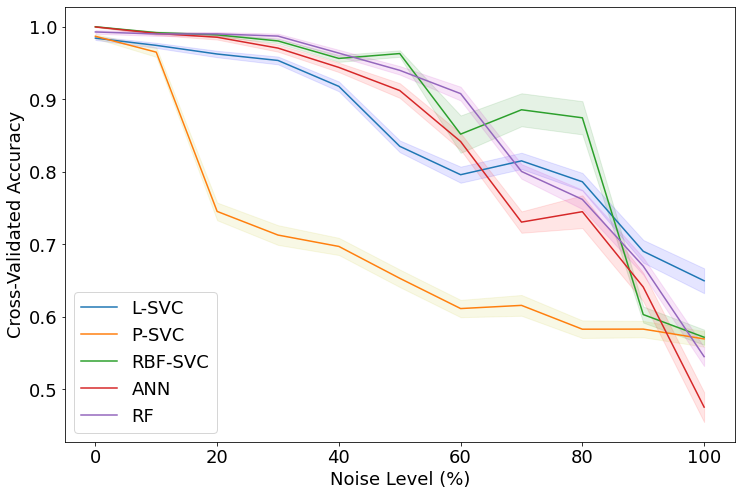

In [178]:
# Accuracy Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_result_ac_banknote, label='L-SVC')
plt.fill_between(k_range, (ub_linear_ac_banknote), (lb_linear_ac_banknote), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, poly_result_ac_banknote, label='P-SVC')
plt.fill_between(k_range, (ub_poly_ac_banknote), (lb_poly_ac_banknote), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, rbf_result_ac_banknote, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_ac_banknote), (lb_rbf_ac_banknote), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, ann_result_ac_banknote, label='ANN')
plt.fill_between(k_range, (ub_ann_ac_banknote), (lb_ann_ac_banknote), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, rf_result_ac_banknote, label='RF')
plt.fill_between(k_range, (ub_rf_ac_banknote), (lb_rf_ac_banknote), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.legend()

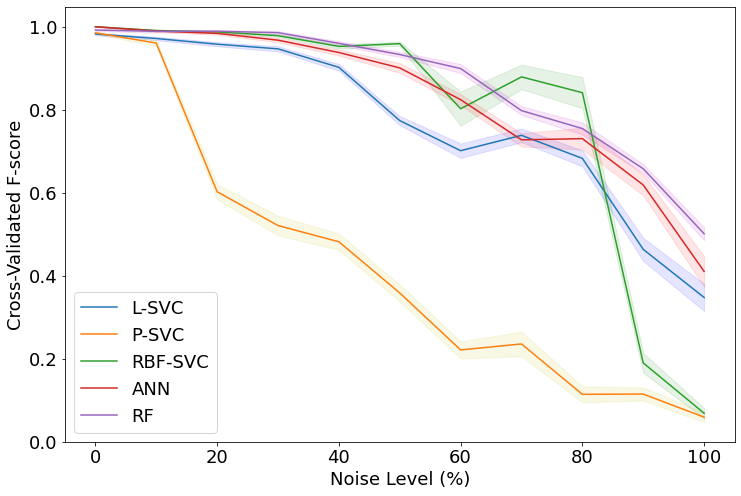

In [179]:
# F1-score Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_result_f1_banknote, label='L-SVC')
plt.fill_between(k_range, (ub_linear_f1_banknote), (lb_linear_f1_banknote), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, poly_result_f1_banknote, label='P-SVC')
plt.fill_between(k_range, (ub_poly_f1_banknote), (lb_poly_f1_banknote), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, rbf_result_f1_banknote, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_f1_banknote), (lb_rbf_f1_banknote), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, ann_result_f1_banknote, label='ANN')
plt.fill_between(k_range, (ub_ann_f1_banknote), (lb_ann_f1_banknote), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, rf_result_f1_banknote, label='RF')
plt.fill_between(k_range, (ub_rf_f1_banknote), (lb_rf_f1_banknote), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.legend()

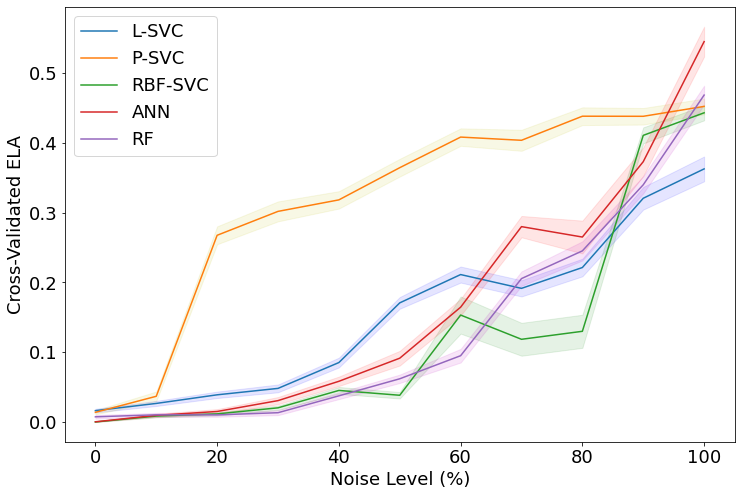

In [181]:
# ELA Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_ela_result_banknote, label='L-SVC')
plt.fill_between(k_range, (ub_linear_ela_banknote), (lb_linear_ela_banknote), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, poly_ela_result_banknote, label='P-SVC')
plt.fill_between(k_range, (ub_poly_ela_banknote), (lb_poly_ela_banknote), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, rbf_ela_result_banknote, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_ela_banknote), (lb_rbf_ela_banknote), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, ann_ela_result_banknote, label='ANN')
plt.fill_between(k_range, (ub_ann_ela_banknote), (lb_ann_ela_banknote), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, rf_ela_result_banknote, label='RF')
plt.fill_between(k_range, (ub_rf_ela_banknote), (lb_rf_ela_banknote), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.legend()

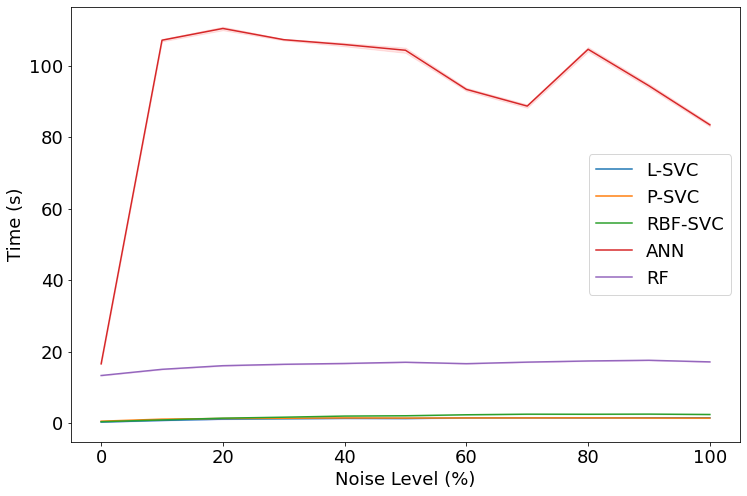

In [182]:
# Time Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, time_linear_sum_banknote, label='L-SVC')
plt.fill_between(k_range, (ub_linear_time_banknote), (lb_linear_time_banknote), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_poly_sum_banknote, label='P-SVC')
plt.fill_between(k_range, (ub_poly_time_banknote), (lb_poly_time_banknote), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_rbf_sum_banknote, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_time_banknote), (lb_rbf_time_banknote), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_ann_sum_banknote, label='ANN')
plt.fill_between(k_range, (ub_ann_time_banknote), (lb_ann_time_banknote), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_rf_sum_banknote, label='RF')
plt.fill_between(k_range, (ub_rf_time_banknote), (lb_rf_time_banknote), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.legend()

In [214]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Accuracy  ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_result_ac_banknote[0],3),round(poly_result_ac_banknote[0],3),round(rbf_result_ac_banknote[0],3),round(ann_result_ac_banknote[0],3),round(rf_result_ac_banknote[0],3)],
                       [round(linear_result_ac_banknote[1],3),round(poly_result_ac_banknote[1],3),round(rbf_result_ac_banknote[1],3),round(ann_result_ac_banknote[1],3),round(rf_result_ac_banknote[1],3)],
                       [round(linear_result_ac_banknote[2],3),round(poly_result_ac_banknote[2],3),round(rbf_result_ac_banknote[2],3),round(ann_result_ac_banknote[2],3),round(rf_result_ac_banknote[2],3)],
                       [round(linear_result_ac_banknote[3],3),round(poly_result_ac_banknote[3],3),round(rbf_result_ac_banknote[3],3),round(ann_result_ac_banknote[3],3),round(rf_result_ac_banknote[3],3)],
                       [round(linear_result_ac_banknote[4],3),round(poly_result_ac_banknote[4],3),round(rbf_result_ac_banknote[4],3),round(ann_result_ac_banknote[4],3),round(rf_result_ac_banknote[4],3)],
                       [round(linear_result_ac_banknote[5],3),round(poly_result_ac_banknote[5],3),round(rbf_result_ac_banknote[5],3),round(ann_result_ac_banknote[5],3),round(rf_result_ac_banknote[5],3)],
                       [round(linear_result_ac_banknote[6],3),round(poly_result_ac_banknote[6],3),round(rbf_result_ac_banknote[6],3),round(ann_result_ac_banknote[6],3),round(rf_result_ac_banknote[6],3)],
                       [round(linear_result_ac_banknote[7],3),round(poly_result_ac_banknote[7],3),round(rbf_result_ac_banknote[7],3),round(ann_result_ac_banknote[7],3),round(rf_result_ac_banknote[7],3)],
                       [round(linear_result_ac_banknote[8],3),round(poly_result_ac_banknote[8],3),round(rbf_result_ac_banknote[8],3),round(ann_result_ac_banknote[8],3),round(rf_result_ac_banknote[8],3)],
                       [round(linear_result_ac_banknote[9],3),round(poly_result_ac_banknote[9],3),round(rbf_result_ac_banknote[9],3),round(ann_result_ac_banknote[9],3),round(rf_result_ac_banknote[9],3)],
                       [round(linear_result_ac_banknote[10],3),round(poly_result_ac_banknote[10],3),round(rbf_result_ac_banknote[10],3),round(ann_result_ac_banknote[10],3),round(rf_result_ac_banknote[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['F-score ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_result_f1_banknote[0],3),round(poly_result_f1_banknote[0],3),round(rbf_result_f1_banknote[0],3),round(ann_result_f1_banknote[0],3),round(rf_result_f1_banknote[0],3)],
                       [round(linear_result_f1_banknote[1],3),round(poly_result_f1_banknote[1],3),round(rbf_result_f1_banknote[1],3),round(ann_result_f1_banknote[1],3),round(rf_result_f1_banknote[1],3)],
                       [round(linear_result_f1_banknote[2],3),round(poly_result_f1_banknote[2],3),round(rbf_result_f1_banknote[2],3),round(ann_result_f1_banknote[2],3),round(rf_result_f1_banknote[2],3)],
                       [round(linear_result_f1_banknote[3],3),round(poly_result_f1_banknote[3],3),round(rbf_result_f1_banknote[3],3),round(ann_result_f1_banknote[3],3),round(rf_result_f1_banknote[3],3)],
                       [round(linear_result_f1_banknote[4],3),round(poly_result_f1_banknote[4],3),round(rbf_result_f1_banknote[4],3),round(ann_result_f1_banknote[4],3),round(rf_result_f1_banknote[4],3)],
                       [round(linear_result_f1_banknote[5],3),round(poly_result_f1_banknote[5],3),round(rbf_result_f1_banknote[5],3),round(ann_result_f1_banknote[5],3),round(rf_result_f1_banknote[5],3)],
                       [round(linear_result_f1_banknote[6],3),round(poly_result_f1_banknote[6],3),round(rbf_result_f1_banknote[6],3),round(ann_result_f1_banknote[6],3),round(rf_result_f1_banknote[6],3)],
                       [round(linear_result_f1_banknote[7],3),round(poly_result_f1_banknote[7],3),round(rbf_result_f1_banknote[7],3),round(ann_result_f1_banknote[7],3),round(rf_result_f1_banknote[7],3)],
                       [round(linear_result_f1_banknote[8],3),round(poly_result_f1_banknote[8],3),round(rbf_result_f1_banknote[8],3),round(ann_result_f1_banknote[8],3),round(rf_result_f1_banknote[8],3)],
                       [round(linear_result_f1_banknote[9],3),round(poly_result_f1_banknote[9],3),round(rbf_result_f1_banknote[9],3),round(ann_result_f1_banknote[9],3),round(rf_result_f1_banknote[9],3)],
                       [round(linear_result_f1_banknote[10],3),round(poly_result_f1_banknote[10],3),round(rbf_result_f1_banknote[10],3),round(ann_result_f1_banknote[10],3),round(rf_result_f1_banknote[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['ELA ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_ela_result_banknote[0],3),round(poly_ela_result_banknote[0],3),round(rbf_ela_result_banknote[0],3),round(ann_ela_result_banknote[0],3),round(rf_ela_result_banknote[0],3)],
                       [round(linear_ela_result_banknote[1],3),round(poly_ela_result_banknote[1],3),round(rbf_ela_result_banknote[1],3),round(ann_ela_result_banknote[1],3),round(rf_ela_result_banknote[1],3)],
                       [round(linear_ela_result_banknote[2],3),round(poly_ela_result_banknote[2],3),round(rbf_ela_result_banknote[2],3),round(ann_ela_result_banknote[2],3),round(rf_ela_result_banknote[2],3)],
                       [round(linear_ela_result_banknote[3],3),round(poly_ela_result_banknote[3],3),round(rbf_ela_result_banknote[3],3),round(ann_ela_result_banknote[3],3),round(rf_ela_result_banknote[3],3)],
                       [round(linear_ela_result_banknote[4],3),round(poly_ela_result_banknote[4],3),round(rbf_ela_result_banknote[4],3),round(ann_ela_result_banknote[4],3),round(rf_ela_result_banknote[4],3)],
                       [round(linear_ela_result_banknote[5],3),round(poly_ela_result_banknote[5],3),round(rbf_ela_result_banknote[5],3),round(ann_ela_result_banknote[5],3),round(rf_ela_result_banknote[5],3)],
                       [round(linear_ela_result_banknote[6],3),round(poly_ela_result_banknote[6],3),round(rbf_ela_result_banknote[6],3),round(ann_ela_result_banknote[6],3),round(rf_ela_result_banknote[6],3)],
                       [round(linear_ela_result_banknote[7],3),round(poly_ela_result_banknote[7],3),round(rbf_ela_result_banknote[7],3),round(ann_ela_result_banknote[7],3),round(rf_ela_result_banknote[7],3)],
                       [round(linear_ela_result_banknote[8],3),round(poly_ela_result_banknote[8],3),round(rbf_ela_result_banknote[8],3),round(ann_ela_result_banknote[8],3),round(rf_ela_result_banknote[8],3)],
                       [round(linear_ela_result_banknote[9],3),round(poly_ela_result_banknote[9],3),round(rbf_ela_result_banknote[9],3),round(ann_ela_result_banknote[9],3),round(rf_ela_result_banknote[9],3)],
                       [round(linear_ela_result_banknote[10],3),round(poly_ela_result_banknote[10],3),round(rbf_ela_result_banknote[10],3),round(ann_ela_result_banknote[10],3),round(rf_ela_result_banknote[10],3)]
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Time (s)',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(time_linear_sum_banknote[0],3),round(time_poly_sum_banknote[0],3),round(time_rbf_sum_banknote[0],3),round(time_ann_sum_banknote[0],3),round(time_rf_sum_banknote[0],3)],
                       [round(time_linear_sum_banknote[1],3),round(time_poly_sum_banknote[1],3),round(time_rbf_sum_banknote[1],3),round(time_ann_sum_banknote[1],3),round(time_rf_sum_banknote[1],3)],
                       [round(time_linear_sum_banknote[2],3),round(time_poly_sum_banknote[2],3),round(time_rbf_sum_banknote[2],3),round(time_ann_sum_banknote[2],3),round(time_rf_sum_banknote[2],3)],
                       [round(time_linear_sum_banknote[3],3),round(time_poly_sum_banknote[3],3),round(time_rbf_sum_banknote[3],3),round(time_ann_sum_banknote[3],3),round(time_rf_sum_banknote[3],3)],
                       [round(time_linear_sum_banknote[4],3),round(time_poly_sum_banknote[4],3),round(time_rbf_sum_banknote[4],3),round(time_ann_sum_banknote[4],3),round(time_rf_sum_banknote[4],3)],
                       [round(time_linear_sum_banknote[5],3),round(time_poly_sum_banknote[5],3),round(time_rbf_sum_banknote[5],3),round(time_ann_sum_banknote[5],3),round(time_rf_sum_banknote[5],3)],
                       [round(time_linear_sum_banknote[6],3),round(time_poly_sum_banknote[6],3),round(time_rbf_sum_banknote[6],3),round(time_ann_sum_banknote[6],3),round(time_rf_sum_banknote[6],3)],
                       [round(time_linear_sum_banknote[7],3),round(time_poly_sum_banknote[7],3),round(time_rbf_sum_banknote[7],3),round(time_ann_sum_banknote[7],3),round(time_rf_sum_banknote[7],3)],
                       [round(time_linear_sum_banknote[8],3),round(time_poly_sum_banknote[8],3),round(time_rbf_sum_banknote[8],3),round(time_ann_sum_banknote[8],3),round(time_rf_sum_banknote[8],3)],
                       [round(time_linear_sum_banknote[9],3),round(time_poly_sum_banknote[9],3),round(time_rbf_sum_banknote[9],3),round(time_ann_sum_banknote[9],3),round(time_rf_sum_banknote[9],3)],
                       [round(time_linear_sum_banknote[10],3),round(time_poly_sum_banknote[10],3),round(time_rbf_sum_banknote[10],3),round(time_ann_sum_banknote[10],3),round(time_rf_sum_banknote[10],3)]
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Classifier','Total Time (s)'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(sum(time_linear_sum_banknote),3),round(sum(time_poly_sum_banknote),3),round(sum(time_rbf_sum_banknote),3),round(sum(time_ann_sum_banknote),3),round(sum(time_rf_sum_banknote),3)],
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

# Diabetes

In [110]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import math
import time
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from statistics import mean
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Loading datasets
df = pd.read_csv('pima-indians-diabetes.csv')
# drop the id columns
#df = df.drop(['id'],axis=1)

df

# How does the proportion of the Target values look like?
df.c9.value_counts()

# X,y,etc should be the size which can be divided by n for n-fold cv. Some lows can be discarded. 
cv = 5
# s will be the length of the dataset <= length which can be divided by cv. 
s = math.floor(len(df)/cv)*cv
# d is the size of each partitioned dataset
d = int(s/cv)

X = df.iloc[:s,:-1].values
y = df.iloc[:s,-1].values
X_noise = df.iloc[:s,:-1].values.copy()

# 10 datasets which is going to be noised. 10%, 20% and so on. 
noise = []
n_range = range(0,10)
for n in n_range:
    noise.append(df.iloc[:s,:-1].values.copy())

ages = df.iloc[:s,7].unique()

ages[51]

ages.shape

# Make mean, std, max and min of every column
n_range = range(0, X.shape[1])
mean = []
std = []
max = []
min = []

for n in n_range: 
    mean.append(X_noise[:,n].mean())
    std.append(X_noise[:,n].std())
    max.append(X_noise[:,n].max())
    min.append(X_noise[:,n].min())

# New noise 

m_range = range(1,11)
for m in m_range:
    X_noise = noise[m-1]
    
    #noise_levels are going to be 0.1, 0.2,...1(10%,20%...)
    noise_level = 0.1 * m
    
    #How many entries(rows) in the dataset we want to add noise?
    noise_entries_amount = int(X.size * noise_level) 
    
    #Create an array with random int which represent the rows we are going to add noise on(no duplicate rows)
    r = np.random.choice(X.size, noise_entries_amount, replace=False)
    
    r_range = range(0,r.size)
    for n in r_range:
        entry = r[n]
        row = int(entry/X.shape[1])
        column = entry%X.shape[1]
        
        if column == 7:
            while True:
                a = np.random.randint(0, 52)
                if X_noise[row][column] != ages[a]:
                    X_noise[row][column] = ages[a].copy()
                    break
        else:   
            g_noise = np.random.normal(mean[column], std[column])
            # if the gaussian noise is greater than the max value of the column, we take the max value as noise. 
            if g_noise > max[column]:
                g_noise = max[column]
                X_noise[row][column] = X_noise[row][column] + g_noise
            # if the gaussian noise is smaller than the min value of the column, we take the min value as noise. 
            elif g_noise < 0:
                g_noise = min[column]
                X_noise[row][column] = X_noise[row][column] + g_noise
            else: 
                X_noise[row][column] = X_noise[row][column] + g_noise


X

noise[0]

noise[9]

X[:20,7]

noise[9][:20,7]

array([34., 70., 58., 59., 48., 41., 42., 48., 24., 47., 62., 65., 63.,
       43., 52., 61., 50., 61., 57., 48.])

In [111]:
linear_means_ac_diabetes = []
poly_means_ac_diabetes = []
rbf_means_ac_diabetes = []
ann_means_ac_diabetes = []
rf_means_ac_diabetes = []

linear_means_f1_diabetes = []
poly_means_f1_diabetes = []
rbf_means_f1_diabetes = []
ann_means_f1_diabetes = []
rf_means_f1_diabetes = []

time_linear_sum_diabetes = []
time_poly_sum_diabetes = []
time_rbf_sum_diabetes = []
time_ann_sum_diabetes = []
time_rf_sum_diabetes = []


scores_linear_ac_diabetes = [[],[],[],[],[],[],[],[],[],[],[]]
scores_poly_ac_diabetes =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rbf_ac_diabetes =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_ann_ac_diabetes =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rf_ac_diabetes =  [[],[],[],[],[],[],[],[],[],[],[]]

scores_linear_f1_diabetes =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_poly_f1_diabetes =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rbf_f1_diabetes =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_ann_f1_diabetes =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rf_f1_diabetes =  [[],[],[],[],[],[],[],[],[],[],[]]

time_linear_diabetes = [[],[],[],[],[],[],[],[],[],[],[]]
time_poly_diabetes = [[],[],[],[],[],[],[],[],[],[],[]]
time_rbf_diabetes = [[],[],[],[],[],[],[],[],[],[],[]]
time_ann_diabetes = [[],[],[],[],[],[],[],[],[],[],[]]
time_rf_diabetes = [[],[],[],[],[],[],[],[],[],[],[]]

In [112]:
for c in range(6):

    X,y,noise[0],noise[1],noise[2],noise[3],noise[4],noise[5],noise[6],noise[7],noise[8],noise[9] = shuffle(X,y,noise[0],noise[1],noise[2],noise[3],noise[4],noise[5],noise[6],noise[7],noise[8],noise[9])

    # p stands for partitioned
    X_p = []
    y_p = []
    # Each [] will contain noised dataset 10%, 20%... which are divided in cv(e.g. 5)
    noise_p = [[],[],[],[],[],[],[],[],[],[],]

    n_range = range(0,10)
    for n in n_range:
        for i in range(0, len(X), d):
                noise_p[n].append(noise[n][i:i + d])
    for i in range(0, len(X), d):
                X_p.append(X[i:i + d])
                y_p.append(y[i:i + d])


    # Cross Validation noise 0 
    from statistics import mean
    first = False

    for i in range(cv):
        start = time.time()
        X_test = X_p[i]
        y_test = y_p[i]
        first = True
        for k in range(cv):
            if k != i:
                if first != True:
                    X_train = np.append(X_train, X_p[k], axis=0)
                    y_train = np.append(y_train, y_p[k], axis=0)
                else: 
                    X_train = X_p[k]
                    y_train = y_p[k]
                    first = False


        # Now all test, train sets are obtained
        linear = svm.SVC(kernel='linear')
        poly = svm.SVC(kernel='poly')
        rbf = svm.SVC(kernel='rbf')
        ann = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
        rf = RandomForestClassifier(n_estimators=200)

        # Train the models
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        end = time.time()
        t = end-start

        linear_start = time.time()
        linear.fit(X_train, y_train)
        pred_linear = linear.predict(X_test)        
        score_linear_ac = accuracy_score(y_test, pred_linear)
        score_linear_f1 = f1_score(y_test, pred_linear)
        scores_linear_ac_diabetes[0].append(score_linear_ac)
        scores_linear_f1_diabetes[0].append(score_linear_f1)
        linear_end = time.time()
        time_linear_diabetes[0].append(t+(linear_end-linear_start))

        poly_start = time.time()
        poly.fit(X_train, y_train)
        pred_poly = poly.predict(X_test)        
        score_poly_ac = accuracy_score(y_test, pred_poly)
        score_poly_f1 = f1_score(y_test, pred_poly)
        scores_poly_ac_diabetes[0].append(score_poly_ac)
        scores_poly_f1_diabetes[0].append(score_poly_f1)
        poly_end = time.time()
        time_poly_diabetes[0].append(t+(poly_end-poly_start))

        rbf_start = time.time()
        rbf.fit(X_train, y_train)
        pred_rbf = rbf.predict(X_test)
        score_rbf_ac = accuracy_score(y_test, pred_rbf)
        scores_rbf_ac_diabetes[0].append(score_rbf_ac)
        score_rbf_f1 = f1_score(y_test, pred_rbf)
        scores_rbf_f1_diabetes[0].append(score_rbf_f1)
        rbf_end = time.time()
        time_rbf_diabetes[0].append(t+(rbf_end-rbf_start))

        ann_start = time.time()
        ann.fit(X_train, y_train)
        pred_ann = ann.predict(X_test)
        score_ann_ac = accuracy_score(y_test, pred_ann)
        scores_ann_ac_diabetes[0].append(score_ann_ac)
        score_ann_f1 = f1_score(y_test, pred_ann)
        scores_ann_f1_diabetes[0].append(score_ann_f1)
        ann_end = time.time()
        time_ann_diabetes[0].append(t+(ann_end-ann_start))

        rf_start = time.time()
        rf.fit(X_train, y_train)
        pred_rf = rf.predict(X_test)
        score_rf_ac = accuracy_score(y_test, pred_rf)
        scores_rf_ac_diabetes[0].append(score_rf_ac)
        score_rf_f1 = f1_score(y_test, pred_rf)
        scores_rf_f1_diabetes[0].append(score_rf_f1)
        rf_end = time.time()
        time_rf_diabetes[0].append(t+(rf_end-rf_start))

    # Cross Validation Linear
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False


            # Now all test, train sets are obtained
            linear = svm.SVC(kernel='linear')

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            linear.fit(X_train, y_train)
            pred_linear = linear.predict(X_test)        
            score_linear_ac = accuracy_score(y_test, pred_linear)
            score_linear_f1 = f1_score(y_test, pred_linear)

            scores_linear_ac_diabetes[n+1].append(score_linear_ac)
            scores_linear_f1_diabetes[n+1].append(score_linear_f1)
        end = time.time()
        t = end-start
        time_linear_diabetes[n+1].append(t)

    # Cross Validation Poly
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            poly = svm.SVC(kernel='poly')

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            poly.fit(X_train, y_train)
            pred_poly = poly.predict(X_test)        
            score_poly_ac = accuracy_score(y_test, pred_poly)
            score_poly_f1 = f1_score(y_test, pred_poly)

            scores_poly_ac_diabetes[n+1].append(score_poly_ac)
            scores_poly_f1_diabetes[n+1].append(score_poly_f1)
        end = time.time()
        t = end-start
        time_poly_diabetes[n+1].append(t)

    # Cross Validation Rbf
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            rbf = svm.SVC(kernel='rbf')

            # Train the models
            #Applying Standard scaling to get optimized result
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            rbf.fit(X_train, y_train)
            pred_rbf = rbf.predict(X_test)

            score_rbf_ac = accuracy_score(y_test, pred_rbf)
            score_rbf_f1 = f1_score(y_test, pred_rbf)

            scores_rbf_ac_diabetes[n+1].append(score_rbf_ac)
            scores_rbf_f1_diabetes[n+1].append(score_rbf_f1)
        end = time.time()
        t = end-start
        time_rbf_diabetes[n+1].append(t)

    # Cross Validation ANN
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            ann = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            ann.fit(X_train, y_train)
            pred_ann = ann.predict(X_test)

            score_ann_ac = accuracy_score(y_test, pred_ann)
            score_ann_f1 = f1_score(y_test, pred_ann)

            scores_ann_ac_diabetes[n+1].append(score_ann_ac)
            scores_ann_f1_diabetes[n+1].append(score_ann_f1)
        end = time.time()
        t = end-start
        time_ann_diabetes[n+1].append(t)

    # Cross Validation RF
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            rf = RandomForestClassifier(n_estimators=200)

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            rf.fit(X_train, y_train)
            pred_rf = rf.predict(X_test)

            score_rf_ac = accuracy_score(y_test, pred_rf)
            score_rf_f1 = f1_score(y_test, pred_rf)

            scores_rf_ac_diabetes[n+1].append(score_rf_ac)
            scores_rf_f1_diabetes[n+1].append(score_rf_f1)
        end = time.time()
        t = end-start
        time_rf_diabetes[n+1].append(t)

    

In [ ]:
for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("Linear accuracy mean is: ", mean(scores_linear_ac_diabetes[n]))
    print("Linear f1 mean is: ", mean(scores_linear_f1_diabetes[n]))
    print("Linear time: ", sum(time_linear_diabetes[n]))

    print("")  
    linear_means_ac_diabetes.append(mean(scores_linear_ac_diabetes[n]))
    linear_means_f1_diabetes.append(mean(scores_linear_f1_diabetes[n]))
    time_linear_sum_diabetes.append(sum(time_linear_diabetes[n]))

for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("Poly accuracy mean is: ", mean(scores_poly_ac_diabetes[n]))
    print("Poly f1 mean is: ", mean(scores_poly_f1_diabetes[n]))
    print("Poly time: ", sum(time_poly_diabetes[n]))

    print("")  
    poly_means_ac_diabetes.append(mean(scores_poly_ac_diabetes[n]))
    poly_means_f1_diabetes.append(mean(scores_poly_f1_diabetes[n]))
    time_poly_sum_diabetes.append(sum(time_poly_diabetes[n]))

for n in range(11):  
    print("Noise level: " + str((n)*10) + '%')    
    print("Rbf accuracy mean is: ", mean(scores_rbf_ac_diabetes[n]))
    print("Rbf f1 mean is: ", mean(scores_rbf_f1_diabetes[n]))
    print("Rbf time: ", sum(time_rbf_diabetes[n]))

    print("")  
    rbf_means_ac_diabetes.append(mean(scores_rbf_ac_diabetes[n]))
    rbf_means_f1_diabetes.append(mean(scores_rbf_f1_diabetes[n]))
    time_rbf_sum_diabetes.append(sum(time_rbf_diabetes[n]))

for n in range(11):  
    print("Noise level: " + str((n)*10) + '%')    
    print("ANN accuracy mean is: ", mean(scores_ann_ac_diabetes[n]))
    print("ANN f1 mean is: ", mean(scores_ann_f1_diabetes[n]))
    print("Ann time: ", sum(time_ann_diabetes[n]))

    print("")  
    ann_means_ac_diabetes.append(mean(scores_ann_ac_diabetes[n]))
    ann_means_f1_diabetes.append(mean(scores_ann_f1_diabetes[n]))
    time_ann_sum_diabetes.append(sum(time_ann_diabetes[n]))

for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("RF accuracy mean is: ", mean(scores_rf_ac_diabetes[n]))
    print("RF f1 mean is: ", mean(scores_rf_f1_diabetes[n]))
    print("Rf time: ", sum(time_rf_diabetes[n]))

    print("")  
    rf_means_ac_diabetes.append(mean(scores_rf_ac_diabetes[n]))
    rf_means_f1_diabetes.append(mean(scores_rf_f1_diabetes[n]))
    time_rf_sum_diabetes.append(sum(time_rf_diabetes[n]))

In [187]:
# Make arrays with all the results [noise0, noise10%, noise20%..]
linear_result_ac_diabetes = linear_means_ac_diabetes.copy()
poly_result_ac_diabetes = poly_means_ac_diabetes.copy()
rbf_result_ac_diabetes = rbf_means_ac_diabetes.copy()
ann_result_ac_diabetes = ann_means_ac_diabetes.copy()
rf_result_ac_diabetes = rf_means_ac_diabetes.copy()

linear_result_f1_diabetes = linear_means_f1_diabetes.copy()
poly_result_f1_diabetes = poly_means_f1_diabetes.copy()
rbf_result_f1_diabetes = rbf_means_f1_diabetes.copy()
ann_result_f1_diabetes = ann_means_f1_diabetes.copy()
rf_result_f1_diabetes = rf_means_f1_diabetes.copy()
    
# Make ELA
linear_ela_result_diabetes = []
poly_ela_result_diabetes = []
rbf_ela_result_diabetes = []
ann_ela_result_diabetes = []
rf_ela_result_diabetes = []

linear_ela_diabetes = [[],[],[],[],[],[],[],[],[],[],[]]
poly_ela_diabetes = [[],[],[],[],[],[],[],[],[],[],[]]
rbf_ela_diabetes = [[],[],[],[],[],[],[],[],[],[],[]]
ann_ela_diabetes = [[],[],[],[],[],[],[],[],[],[],[]]
rf_ela_diabetes = [[],[],[],[],[],[],[],[],[],[],[]]

for i in range (0,11):
    for k in range (30):
        linear_ela_diabetes[i].append((100-100*scores_linear_ac_diabetes[i][k])/(100*linear_means_ac[0]))
        poly_ela_diabetes[i].append((100-100*scores_poly_ac_diabetes[i][k])/(100*poly_means_ac[0]))
        rbf_ela_diabetes[i].append((100-100*scores_rbf_ac_diabetes[i][k])/(100*rbf_means_ac[0]))
        ann_ela_diabetes[i].append((100-100*scores_ann_ac_diabetes[i][k])/(100*ann_means_ac[0]))
        rf_ela_diabetes[i].append((100-100*scores_rf_ac_diabetes[i][k])/(100*rf_means_ac[0]))

    linear_ela_result_diabetes.append(mean(linear_ela_diabetes[i]))
    poly_ela_result_diabetes.append(mean(poly_ela_diabetes[i]))
    rbf_ela_result_diabetes.append(mean(rbf_ela_diabetes[i]))
    ann_ela_result_diabetes.append(mean(ann_ela_diabetes[i]))
    rf_ela_result_diabetes.append(mean(rf_ela_diabetes[i]))
    

In [188]:
#Confidence Interval 

cis_linear_diabetes = []
cis_poly_diabetes = []
cis_rbf_diabetes = []
cis_ann_diabetes = []
cis_rf_diabetes = []

cis_linear_f1_diabetes = []
cis_poly_f1_diabetes = []
cis_rbf_f1_diabetes = []
cis_ann_f1_diabetes = []
cis_rf_f1_diabetes = []

cis_linear_ela = []
cis_poly_ela = []
cis_rbf_ela = []
cis_ann_ela = []
cis_rf_ela = []

cis_linear_time = []
cis_poly_time = []
cis_rbf_time = []
cis_ann_time = []
cis_rf_time = []

#ac
for i in range(11):
    ci_std_linear = np.std(scores_linear_ac_diabetes[i])
    ci_std_poly = np.std(scores_poly_ac_diabetes[i])
    ci_std_rbf = np.std(scores_rbf_ac_diabetes[i])
    ci_std_ann = np.std(scores_ann_ac_diabetes[i])
    ci_std_rf = np.std(scores_rf_ac_diabetes[i])
    
    cis_linear_diabetes.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_diabetes.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_diabetes.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_diabetes.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_diabetes.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_ac_diabetes = np.add(linear_means_ac_diabetes,cis_linear_diabetes)
ub_poly_ac_diabetes = np.add(poly_means_ac_diabetes,cis_poly_diabetes)
ub_rbf_ac_diabetes = np.add(rbf_means_ac_diabetes,cis_rbf_diabetes)
ub_ann_ac_diabetes = np.add(ann_means_ac_diabetes,cis_ann_diabetes)
ub_rf_ac_diabetes = np.add(rf_means_ac_diabetes,cis_rf_diabetes)
lb_linear_ac_diabetes = np.subtract(linear_means_ac_diabetes,cis_linear_diabetes)
lb_poly_ac_diabetes = np.subtract(poly_means_ac_diabetes,cis_poly_diabetes)
lb_rbf_ac_diabetes = np.subtract(rbf_means_ac_diabetes,cis_rbf_diabetes)
lb_ann_ac_diabetes = np.subtract(ann_means_ac_diabetes,cis_ann_diabetes)
lb_rf_ac_diabetes = np.subtract(rf_means_ac_diabetes,cis_rf_diabetes)

#f1
for i in range(11):
    ci_std_linear = np.std(scores_linear_f1_diabetes[i])
    ci_std_poly = np.std(scores_poly_f1_diabetes[i])
    ci_std_rbf = np.std(scores_rbf_f1_diabetes[i])
    ci_std_ann = np.std(scores_ann_f1_diabetes[i])
    ci_std_rf = np.std(scores_rf_f1_diabetes[i])
    
    cis_linear_f1_diabetes.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_f1_diabetes.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_f1_diabetes.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_f1_diabetes.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_f1_diabetes.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_f1_diabetes = np.add(linear_means_f1_diabetes,cis_linear_f1_diabetes)
ub_poly_f1_diabetes = np.add(poly_means_f1_diabetes,cis_poly_f1_diabetes)
ub_rbf_f1_diabetes = np.add(rbf_means_f1_diabetes,cis_rbf_f1_diabetes)
ub_ann_f1_diabetes = np.add(ann_means_f1_diabetes,cis_ann_f1_diabetes)
ub_rf_f1_diabetes = np.add(rf_means_f1_diabetes,cis_rf_f1_diabetes)
lb_linear_f1_diabetes = np.subtract(linear_means_f1_diabetes,cis_linear_f1_diabetes)
lb_poly_f1_diabetes = np.subtract(poly_means_f1_diabetes,cis_poly_f1_diabetes)
lb_rbf_f1_diabetes = np.subtract(rbf_means_f1_diabetes,cis_rbf_f1_diabetes)
lb_ann_f1_diabetes = np.subtract(ann_means_f1_diabetes,cis_ann_f1_diabetes)
lb_rf_f1_diabetes = np.subtract(rf_means_f1_diabetes,cis_rf_f1_diabetes)

#ELA
for i in range(11):
    ci_std_linear = np.std(linear_ela_diabetes[i])
    ci_std_poly = np.std(poly_ela_diabetes[i])
    ci_std_rbf = np.std(rbf_ela_diabetes[i])
    ci_std_ann = np.std(ann_ela_diabetes[i])
    ci_std_rf = np.std(rf_ela_diabetes[i])
    
    cis_linear_ela.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_ela.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_ela.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_ela.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_ela.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_ela_diabetes = np.add(linear_ela_result_diabetes,cis_linear_ela)
ub_poly_ela_diabetes = np.add(poly_ela_result_diabetes,cis_poly_ela)
ub_rbf_ela_diabetes = np.add(rbf_ela_result_diabetes,cis_rbf_ela)
ub_ann_ela_diabetes = np.add(ann_ela_result_diabetes,cis_ann_ela)
ub_rf_ela_diabetes = np.add(rf_ela_result_diabetes,cis_rf_ela)
lb_linear_ela_diabetes = np.subtract(linear_ela_result_diabetes,cis_linear_ela)
lb_poly_ela_diabetes = np.subtract(poly_ela_result_diabetes,cis_poly_ela)
lb_rbf_ela_diabetes = np.subtract(rbf_ela_result_diabetes,cis_rbf_ela)
lb_ann_ela_diabetes = np.subtract(ann_ela_result_diabetes,cis_ann_ela)
lb_rf_ela_diabetes = np.subtract(rf_ela_result_diabetes,cis_rf_ela)

#Time
for i in range(11):
    ci_std_linear = np.std(time_linear_diabetes[i])
    ci_std_poly = np.std(time_poly_diabetes[i])
    ci_std_rbf = np.std(time_rbf_diabetes[i])
    ci_std_ann = np.std(time_ann_diabetes[i])
    ci_std_rf = np.std(time_rf_diabetes[i])
    
    cis_linear_time.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_time.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_time.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_time.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_time.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_time_diabetes = np.add(time_linear_sum_diabetes,cis_linear_time)
ub_poly_time_diabetes = np.add(time_poly_sum_diabetes,cis_poly_time)
ub_rbf_time_diabetes = np.add(time_rbf_sum_diabetes,cis_rbf_time)
ub_ann_time_diabetes = np.add(time_ann_sum_diabetes,cis_ann_time)
ub_rf_time_diabetes = np.add(time_rf_sum_diabetes,cis_rf_time)
lb_linear_time_diabetes = np.subtract(time_linear_sum_diabetes,cis_linear_time)
lb_poly_time_diabetes = np.subtract(time_poly_sum_diabetes,cis_poly_time)
lb_rbf_time_diabetes = np.subtract(time_rbf_sum_diabetes,cis_rbf_time)
lb_ann_time_diabetes = np.subtract(time_ann_sum_diabetes,cis_ann_time)
lb_rf_time_diabetes = np.subtract(time_rf_sum_diabetes,cis_rf_time)
       

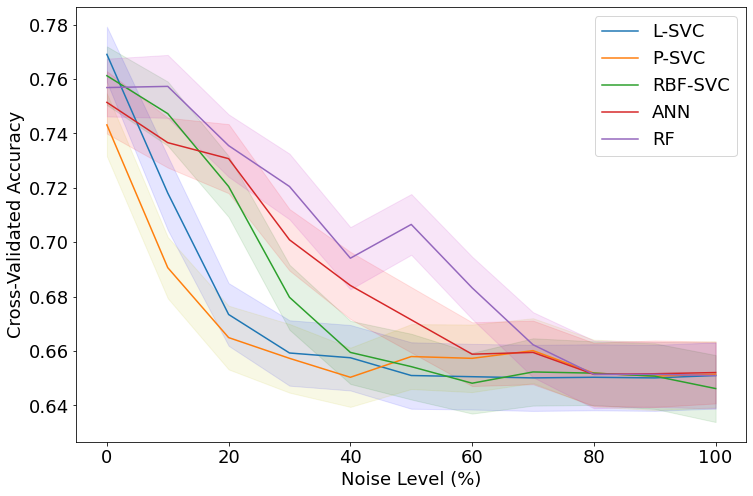

In [189]:
# Accuracy Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_result_ac_diabetes, label='L-SVC')
plt.fill_between(k_range, (ub_linear_ac_diabetes), (lb_linear_ac_diabetes), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, poly_result_ac_diabetes, label='P-SVC')
plt.fill_between(k_range, (ub_poly_ac_diabetes), (lb_poly_ac_diabetes), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, rbf_result_ac_diabetes, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_ac_diabetes), (lb_rbf_ac_diabetes), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, ann_result_ac_diabetes, label='ANN')
plt.fill_between(k_range, (ub_ann_ac_diabetes), (lb_ann_ac_diabetes), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, rf_result_ac_diabetes, label='RF')
plt.fill_between(k_range, (ub_rf_ac_diabetes), (lb_rf_ac_diabetes), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.legend()

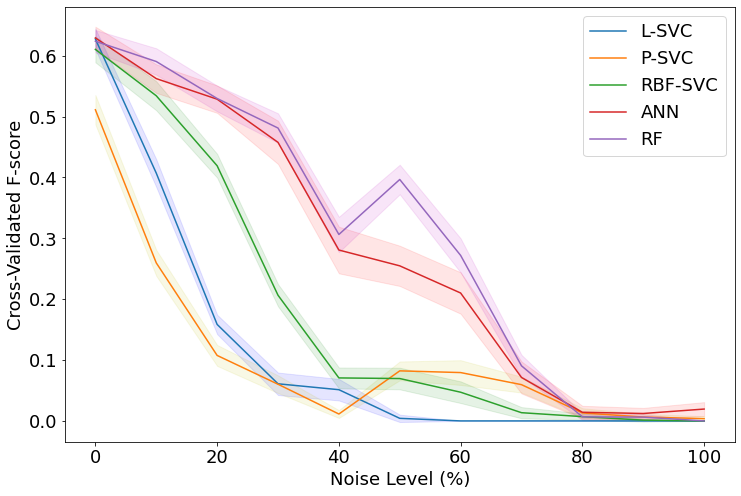

In [191]:
# F1-score Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_result_f1_diabetes, label='L-SVC')
plt.fill_between(k_range, (ub_linear_f1_diabetes), (lb_linear_f1_diabetes), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, poly_result_f1_diabetes, label='P-SVC')
plt.fill_between(k_range, (ub_poly_f1_diabetes), (lb_poly_f1_diabetes), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, rbf_result_f1_diabetes, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_f1_diabetes), (lb_rbf_f1_diabetes), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, ann_result_f1_diabetes, label='ANN')
plt.fill_between(k_range, (ub_ann_f1_diabetes), (lb_ann_f1_diabetes), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, rf_result_f1_diabetes, label='RF')
plt.fill_between(k_range, (ub_rf_f1_diabetes), (lb_rf_f1_diabetes), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.legend()

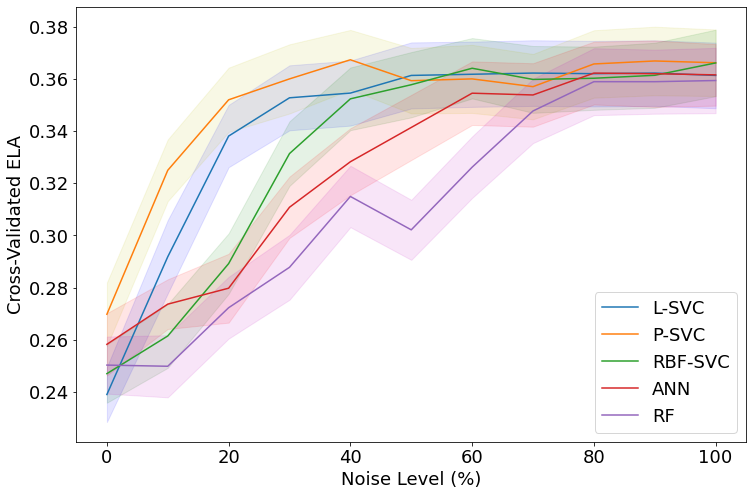

In [192]:
# ELA Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_ela_result_diabetes, label='L-SVC')
plt.fill_between(k_range, (ub_linear_ela_diabetes), (lb_linear_ela_diabetes), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, poly_ela_result_diabetes, label='P-SVC')
plt.fill_between(k_range, (ub_poly_ela_diabetes), (lb_poly_ela_diabetes), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, rbf_ela_result_diabetes, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_ela_diabetes), (lb_rbf_ela_diabetes), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, ann_ela_result_diabetes, label='ANN')
plt.fill_between(k_range, (ub_ann_ela_diabetes), (lb_ann_ela_diabetes), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, rf_ela_result_diabetes, label='RF')
plt.fill_between(k_range, (ub_rf_ela_diabetes), (lb_rf_ela_diabetes), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.legend()

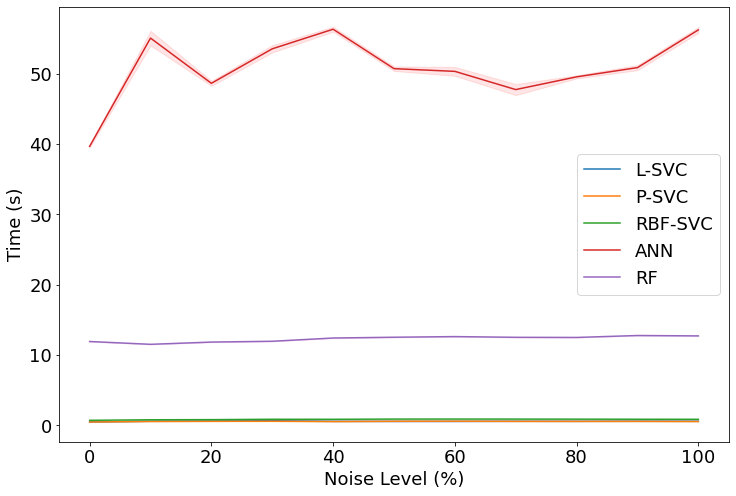

In [193]:
# Time Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, time_linear_sum_diabetes, label='L-SVC')
plt.fill_between(k_range, (ub_linear_time_diabetes), (lb_linear_time_diabetes), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_poly_sum_diabetes, label='P-SVC')
plt.fill_between(k_range, (ub_poly_time_diabetes), (lb_poly_time_diabetes), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_rbf_sum_diabetes, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_time_diabetes), (lb_rbf_time_diabetes), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_ann_sum_diabetes, label='ANN')
plt.fill_between(k_range, (ub_ann_time_diabetes), (lb_ann_time_diabetes), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_rf_sum_diabetes, label='RF')
plt.fill_between(k_range, (ub_rf_time_diabetes), (lb_rf_time_diabetes), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.legend()

#### import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Accuracy  ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_result_ac_diabetes[0],3),round(poly_result_ac_diabetes[0],3),round(rbf_result_ac_diabetes[0],3),round(ann_result_ac_diabetes[0],3),round(rf_result_ac_diabetes[0],3)],
                       [round(linear_result_ac_diabetes[1],3),round(poly_result_ac_diabetes[1],3),round(rbf_result_ac_diabetes[1],3),round(ann_result_ac_diabetes[1],3),round(rf_result_ac_diabetes[1],3)],
                       [round(linear_result_ac_diabetes[2],3),round(poly_result_ac_diabetes[2],3),round(rbf_result_ac_diabetes[2],3),round(ann_result_ac_diabetes[2],3),round(rf_result_ac_diabetes[2],3)],
                       [round(linear_result_ac_diabetes[3],3),round(poly_result_ac_diabetes[3],3),round(rbf_result_ac_diabetes[3],3),round(ann_result_ac_diabetes[3],3),round(rf_result_ac_diabetes[3],3)],
                       [round(linear_result_ac_diabetes[4],3),round(poly_result_ac_diabetes[4],3),round(rbf_result_ac_diabetes[4],3),round(ann_result_ac_diabetes[4],3),round(rf_result_ac_diabetes[4],3)],
                       [round(linear_result_ac_diabetes[5],3),round(poly_result_ac_diabetes[5],3),round(rbf_result_ac_diabetes[5],3),round(ann_result_ac_diabetes[5],3),round(rf_result_ac_diabetes[5],3)],
                       [round(linear_result_ac_diabetes[6],3),round(poly_result_ac_diabetes[6],3),round(rbf_result_ac_diabetes[6],3),round(ann_result_ac_diabetes[6],3),round(rf_result_ac_diabetes[6],3)],
                       [round(linear_result_ac_diabetes[7],3),round(poly_result_ac_diabetes[7],3),round(rbf_result_ac_diabetes[7],3),round(ann_result_ac_diabetes[7],3),round(rf_result_ac_diabetes[7],3)],
                       [round(linear_result_ac_diabetes[8],3),round(poly_result_ac_diabetes[8],3),round(rbf_result_ac_diabetes[8],3),round(ann_result_ac_diabetes[8],3),round(rf_result_ac_diabetes[8],3)],
                       [round(linear_result_ac_diabetes[9],3),round(poly_result_ac_diabetes[9],3),round(rbf_result_ac_diabetes[9],3),round(ann_result_ac_diabetes[9],3),round(rf_result_ac_diabetes[9],3)],
                       [round(linear_result_ac_diabetes[10],3),round(poly_result_ac_diabetes[10],3),round(rbf_result_ac_diabetes[10],3),round(ann_result_ac_diabetes[10],3),round(rf_result_ac_diabetes[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['F1-score ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_result_f1_diabetes[0],3),round(poly_result_f1_diabetes[0],3),round(rbf_result_f1_diabetes[0],3),round(ann_result_f1_diabetes[0],3),round(rf_result_f1_diabetes[0],3)],
                       [round(linear_result_f1_diabetes[1],3),round(poly_result_f1_diabetes[1],3),round(rbf_result_f1_diabetes[1],3),round(ann_result_f1_diabetes[1],3),round(rf_result_f1_diabetes[1],3)],
                       [round(linear_result_f1_diabetes[2],3),round(poly_result_f1_diabetes[2],3),round(rbf_result_f1_diabetes[2],3),round(ann_result_f1_diabetes[2],3),round(rf_result_f1_diabetes[2],3)],
                       [round(linear_result_f1_diabetes[3],3),round(poly_result_f1_diabetes[3],3),round(rbf_result_f1_diabetes[3],3),round(ann_result_f1_diabetes[3],3),round(rf_result_f1_diabetes[3],3)],
                       [round(linear_result_f1_diabetes[4],3),round(poly_result_f1_diabetes[4],3),round(rbf_result_f1_diabetes[4],3),round(ann_result_f1_diabetes[4],3),round(rf_result_f1_diabetes[4],3)],
                       [round(linear_result_f1_diabetes[5],3),round(poly_result_f1_diabetes[5],3),round(rbf_result_f1_diabetes[5],3),round(ann_result_f1_diabetes[5],3),round(rf_result_f1_diabetes[5],3)],
                       [round(linear_result_f1_diabetes[6],3),round(poly_result_f1_diabetes[6],3),round(rbf_result_f1_diabetes[6],3),round(ann_result_f1_diabetes[6],3),round(rf_result_f1_diabetes[6],3)],
                       [round(linear_result_f1_diabetes[7],3),round(poly_result_f1_diabetes[7],3),round(rbf_result_f1_diabetes[7],3),round(ann_result_f1_diabetes[7],3),round(rf_result_f1_diabetes[7],3)],
                       [round(linear_result_f1_diabetes[8],3),round(poly_result_f1_diabetes[8],3),round(rbf_result_f1_diabetes[8],3),round(ann_result_f1_diabetes[8],3),round(rf_result_f1_diabetes[8],3)],
                       [round(linear_result_f1_diabetes[9],3),round(poly_result_f1_diabetes[9],3),round(rbf_result_f1_diabetes[9],3),round(ann_result_f1_diabetes[9],3),round(rf_result_f1_diabetes[9],3)],
                       [round(linear_result_f1_diabetes[10],3),round(poly_result_f1_diabetes[10],3),round(rbf_result_f1_diabetes[10],3),round(ann_result_f1_diabetes[10],3),round(rf_result_f1_diabetes[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['ELA ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_ela_result_diabetes[0],3),round(poly_ela_result_diabetes[0],3),round(rbf_ela_result_diabetes[0],3),round(ann_ela_result_diabetes[0],3),round(rf_ela_result_diabetes[0],3)],
                       [round(linear_ela_result_diabetes[1],3),round(poly_ela_result_diabetes[1],3),round(rbf_ela_result_diabetes[1],3),round(ann_ela_result_diabetes[1],3),round(rf_ela_result_diabetes[1],3)],
                       [round(linear_ela_result_diabetes[2],3),round(poly_ela_result_diabetes[2],3),round(rbf_ela_result_diabetes[2],3),round(ann_ela_result_diabetes[2],3),round(rf_ela_result_diabetes[2],3)],
                       [round(linear_ela_result_diabetes[3],3),round(poly_ela_result_diabetes[3],3),round(rbf_ela_result_diabetes[3],3),round(ann_ela_result_diabetes[3],3),round(rf_ela_result_diabetes[3],3)],
                       [round(linear_ela_result_diabetes[4],3),round(poly_ela_result_diabetes[4],3),round(rbf_ela_result_diabetes[4],3),round(ann_ela_result_diabetes[4],3),round(rf_ela_result_diabetes[4],3)],
                       [round(linear_ela_result_diabetes[5],3),round(poly_ela_result_diabetes[5],3),round(rbf_ela_result_diabetes[5],3),round(ann_ela_result_diabetes[5],3),round(rf_ela_result_diabetes[5],3)],
                       [round(linear_ela_result_diabetes[6],3),round(poly_ela_result_diabetes[6],3),round(rbf_ela_result_diabetes[6],3),round(ann_ela_result_diabetes[6],3),round(rf_ela_result_diabetes[6],3)],
                       [round(linear_ela_result_diabetes[7],3),round(poly_ela_result_diabetes[7],3),round(rbf_ela_result_diabetes[7],3),round(ann_ela_result_diabetes[7],3),round(rf_ela_result_diabetes[7],3)],
                       [round(linear_ela_result_diabetes[8],3),round(poly_ela_result_diabetes[8],3),round(rbf_ela_result_diabetes[8],3),round(ann_ela_result_diabetes[8],3),round(rf_ela_result_diabetes[8],3)],
                       [round(linear_ela_result_diabetes[9],3),round(poly_ela_result_diabetes[9],3),round(rbf_ela_result_diabetes[9],3),round(ann_ela_result_diabetes[9],3),round(rf_ela_result_diabetes[9],3)],
                       [round(linear_ela_result_diabetes[10],3),round(poly_ela_result_diabetes[10],3),round(rbf_ela_result_diabetes[10],3),round(ann_ela_result_diabetes[10],3),round(rf_ela_result_diabetes[10],3)]
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Time (s)',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(time_linear_sum_diabetes[0],3),round(time_poly_sum_diabetes[0],3),round(time_rbf_sum_diabetes[0],3),round(time_ann_sum_diabetes[0],3),round(time_rf_sum_diabetes[0],3)],
                       [round(time_linear_sum_diabetes[1],3),round(time_poly_sum_diabetes[1],3),round(time_rbf_sum_diabetes[1],3),round(time_ann_sum_diabetes[1],3),round(time_rf_sum_diabetes[1],3)],
                       [round(time_linear_sum_diabetes[2],3),round(time_poly_sum_diabetes[2],3),round(time_rbf_sum_diabetes[2],3),round(time_ann_sum_diabetes[2],3),round(time_rf_sum_diabetes[2],3)],
                       [round(time_linear_sum_diabetes[3],3),round(time_poly_sum_diabetes[3],3),round(time_rbf_sum_diabetes[3],3),round(time_ann_sum_diabetes[3],3),round(time_rf_sum_diabetes[3],3)],
                       [round(time_linear_sum_diabetes[4],3),round(time_poly_sum_diabetes[4],3),round(time_rbf_sum_diabetes[4],3),round(time_ann_sum_diabetes[4],3),round(time_rf_sum_diabetes[4],3)],
                       [round(time_linear_sum_diabetes[5],3),round(time_poly_sum_diabetes[5],3),round(time_rbf_sum_diabetes[5],3),round(time_ann_sum_diabetes[5],3),round(time_rf_sum_diabetes[5],3)],
                       [round(time_linear_sum_diabetes[6],3),round(time_poly_sum_diabetes[6],3),round(time_rbf_sum_diabetes[6],3),round(time_ann_sum_diabetes[6],3),round(time_rf_sum_diabetes[6],3)],
                       [round(time_linear_sum_diabetes[7],3),round(time_poly_sum_diabetes[7],3),round(time_rbf_sum_diabetes[7],3),round(time_ann_sum_diabetes[7],3),round(time_rf_sum_diabetes[7],3)],
                       [round(time_linear_sum_diabetes[8],3),round(time_poly_sum_diabetes[8],3),round(time_rbf_sum_diabetes[8],3),round(time_ann_sum_diabetes[8],3),round(time_rf_sum_diabetes[8],3)],
                       [round(time_linear_sum_diabetes[9],3),round(time_poly_sum_diabetes[9],3),round(time_rbf_sum_diabetes[9],3),round(time_ann_sum_diabetes[9],3),round(time_rf_sum_diabetes[9],3)],
                       [round(time_linear_sum_diabetes[10],3),round(time_poly_sum_diabetes[10],3),round(time_rbf_sum_diabetes[10],3),round(time_ann_sum_diabetes[10],3),round(time_rf_sum_diabetes[10],3)]
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Classifier','Total Time (s)'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(sum(time_linear_sum_diabetes),3),round(sum(time_poly_sum_diabetes),3),round(sum(time_rbf_sum_diabetes),3),round(sum(time_ann_sum_diabetes),3),round(sum(time_rf_sum_diabetes),3)],
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

# Spam

In [119]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import math
import time
from imblearn.over_sampling import SMOTE
from statistics import mean
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Loading datasets
df=pd.read_csv('spambase.csv')

df

df = df.rename(columns = {'1':'c1','2':'c2','3':'c3','4':'c4','5':'c5','6':'c6','7':'c7','8':'c8','9':'c9','10':'c10',
        '11':'c11','12':'c12','13':'c13','14':'c14','15':'c15','16':'c16','17':'c17','18':'c18','19':'c19','20':'c20',
        '21':'c21','22':'c22','23':'c23','24':'c24','25':'c25','26':'c26','27':'c27','28':'c28','29':'c29','30':'c30',
        '31':'c31','32':'c32','33':'c33','34':'c34','35':'c35','36':'c36','37':'c37','38':'c38','39':'c39','40':'c40',
        '41':'c41','42':'c42','43':'c43','44':'c44','45':'c45','46':'c46','47':'c47','48':'c48','49':'c49','50':'c50',
        '51':'c51','52':'c52','53':'c53','54':'c54','55':'c55','56':'c56','57':'c57','58':'c58'
                                   }, inplace = False)

# How does the proportion of the Target values look like?
df.c58.value_counts()

# X,y,etc should be the size which can be divided by n for n-fold cv. Some lows can be discarded. 
cv = 5
# s will be the length of the dataset <= length which can be divided by cv. 
s = math.floor(len(df)/cv)*cv
# d is the size of each partitioned dataset
d = int(s/cv)

X = df.iloc[:s,:-1].values
y = df.iloc[:s,-1].values
X_noise = df.iloc[:s,:-1].values.copy()

# 10 datasets which is going to be noised. 10%, 20% and so on. 
noise = []
n_range = range(0,10)
for n in n_range:
    noise.append(df.iloc[:s,:-1].values.copy())

df.shape

X.shape

# Make mean, std, max and min of every column
n_range = range(0, X.shape[1])
mean = []
std = []
max = []
min = []

for n in n_range: 
    mean.append(X_noise[:,n].mean())
    std.append(X_noise[:,n].std())
    max.append(X_noise[:,n].max())
    min.append(X_noise[:,n].min())

# New noise 

m_range = range(1,11)
for m in m_range:
    X_noise = noise[m-1]
    
    #noise_levels are going to be 0.1, 0.2,...1(10%,20%...)
    noise_level = 0.1 * m
    
    #How many entries(rows) in the dataset we want to add noise?
    noise_entries_amount = int(X.size * noise_level) 
    
    #Create an array with random int which represent the rows we are going to add noise on(no duplicate rows)
    r = np.random.choice(X.size, noise_entries_amount, replace=False)

    r_range = range(0,r.size)
    for n in r_range:
        entry = r[n]
        row = int(entry/X.shape[1])
        column = entry%X.shape[1]
            
        g_noise = np.random.normal(mean[column], std[column])
        # if the gaussian noise is greater than the max value of the column, we take the max value as noise. 
        if g_noise > max[column]:
            g_noise = max[column]
            X_noise[row][column] = X_noise[row][column] + g_noise
        # if the gaussian noise is smaller than the min value of the column, we take the min value as noise. 
        elif g_noise < 0:
            g_noise = min[column]
            X_noise[row][column] = X_noise[row][column] + g_noise

        else: 
            X_noise[row][column] = X_noise[row][column] + g_noise
        

In [120]:
linear_means_ac_spam = []
poly_means_ac_spam = []
rbf_means_ac_spam = []
ann_means_ac_spam = []
rf_means_ac_spam = []

linear_means_f1_spam = []
poly_means_f1_spam = []
rbf_means_f1_spam = []
ann_means_f1_spam = []
rf_means_f1_spam = []

time_linear_sum_spam = []
time_poly_sum_spam = []
time_rbf_sum_spam = []
time_ann_sum_spam = []
time_rf_sum_spam = []


scores_linear_ac_spam = [[],[],[],[],[],[],[],[],[],[],[]]
scores_poly_ac_spam =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rbf_ac_spam =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_ann_ac_spam =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rf_ac_spam =  [[],[],[],[],[],[],[],[],[],[],[]]

scores_linear_f1_spam =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_poly_f1_spam =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rbf_f1_spam =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_ann_f1_spam =  [[],[],[],[],[],[],[],[],[],[],[]]
scores_rf_f1_spam =  [[],[],[],[],[],[],[],[],[],[],[]]

time_linear_spam = [[],[],[],[],[],[],[],[],[],[],[]]
time_poly_spam = [[],[],[],[],[],[],[],[],[],[],[]]
time_rbf_spam = [[],[],[],[],[],[],[],[],[],[],[]]
time_ann_spam = [[],[],[],[],[],[],[],[],[],[],[]]
time_rf_spam = [[],[],[],[],[],[],[],[],[],[],[]]

In [121]:
for c in range(6):

    X,y,noise[0],noise[1],noise[2],noise[3],noise[4],noise[5],noise[6],noise[7],noise[8],noise[9] = shuffle(X,y,noise[0],noise[1],noise[2],noise[3],noise[4],noise[5],noise[6],noise[7],noise[8],noise[9])

    # p stands for partitioned
    X_p = []
    y_p = []
    # Each [] will contain noised dataset 10%, 20%... which are divided in cv(e.g. 5)
    noise_p = [[],[],[],[],[],[],[],[],[],[],]

    n_range = range(0,10)
    for n in n_range:
        for i in range(0, len(X), d):
                noise_p[n].append(noise[n][i:i + d])
    for i in range(0, len(X), d):
                X_p.append(X[i:i + d])
                y_p.append(y[i:i + d])


    # Cross Validation noise 0 
    from statistics import mean
    first = False

    for i in range(cv):
        start = time.time()
        X_test = X_p[i]
        y_test = y_p[i]
        first = True
        for k in range(cv):
            if k != i:
                if first != True:
                    X_train = np.append(X_train, X_p[k], axis=0)
                    y_train = np.append(y_train, y_p[k], axis=0)
                else: 
                    X_train = X_p[k]
                    y_train = y_p[k]
                    first = False


        # Now all test, train sets are obtained
        linear = svm.SVC(kernel='linear')
        poly = svm.SVC(kernel='poly')
        rbf = svm.SVC(kernel='rbf')
        ann = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
        rf = RandomForestClassifier(n_estimators=200)

        # Train the models
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        end = time.time()
        t = end-start

        linear_start = time.time()
        linear.fit(X_train, y_train)
        pred_linear = linear.predict(X_test)        
        score_linear_ac = accuracy_score(y_test, pred_linear)
        score_linear_f1 = f1_score(y_test, pred_linear)
        scores_linear_ac_spam[0].append(score_linear_ac)
        scores_linear_f1_spam[0].append(score_linear_f1)
        linear_end = time.time()
        time_linear_spam[0].append(t+(linear_end-linear_start))

        poly_start = time.time()
        poly.fit(X_train, y_train)
        pred_poly = poly.predict(X_test)        
        score_poly_ac = accuracy_score(y_test, pred_poly)
        score_poly_f1 = f1_score(y_test, pred_poly)
        scores_poly_ac_spam[0].append(score_poly_ac)
        scores_poly_f1_spam[0].append(score_poly_f1)
        poly_end = time.time()
        time_poly_spam[0].append(t+(poly_end-poly_start))

        rbf_start = time.time()
        rbf.fit(X_train, y_train)
        pred_rbf = rbf.predict(X_test)
        score_rbf_ac = accuracy_score(y_test, pred_rbf)
        scores_rbf_ac_spam[0].append(score_rbf_ac)
        score_rbf_f1 = f1_score(y_test, pred_rbf)
        scores_rbf_f1_spam[0].append(score_rbf_f1)
        rbf_end = time.time()
        time_rbf_spam[0].append(t+(rbf_end-rbf_start))

        ann_start = time.time()
        ann.fit(X_train, y_train)
        pred_ann = ann.predict(X_test)
        score_ann_ac = accuracy_score(y_test, pred_ann)
        scores_ann_ac_spam[0].append(score_ann_ac)
        score_ann_f1 = f1_score(y_test, pred_ann)
        scores_ann_f1_spam[0].append(score_ann_f1)
        ann_end = time.time()
        time_ann_spam[0].append(t+(ann_end-ann_start))

        rf_start = time.time()
        rf.fit(X_train, y_train)
        pred_rf = rf.predict(X_test)
        score_rf_ac = accuracy_score(y_test, pred_rf)
        scores_rf_ac_spam[0].append(score_rf_ac)
        score_rf_f1 = f1_score(y_test, pred_rf)
        scores_rf_f1_spam[0].append(score_rf_f1)
        rf_end = time.time()
        time_rf_spam[0].append(t+(rf_end-rf_start))

    # Cross Validation Linear
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False


            # Now all test, train sets are obtained
            linear = svm.SVC(kernel='linear')

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            linear.fit(X_train, y_train)
            pred_linear = linear.predict(X_test)        
            score_linear_ac = accuracy_score(y_test, pred_linear)
            score_linear_f1 = f1_score(y_test, pred_linear)

            scores_linear_ac_spam[n+1].append(score_linear_ac)
            scores_linear_f1_spam[n+1].append(score_linear_f1)
        end = time.time()
        t = end-start
        time_linear_spam[n+1].append(t)

    # Cross Validation Poly
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            poly = svm.SVC(kernel='poly')

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            poly.fit(X_train, y_train)
            pred_poly = poly.predict(X_test)        
            score_poly_ac = accuracy_score(y_test, pred_poly)
            score_poly_f1 = f1_score(y_test, pred_poly)

            scores_poly_ac_spam[n+1].append(score_poly_ac)
            scores_poly_f1_spam[n+1].append(score_poly_f1)
        end = time.time()
        t = end-start
        time_poly_spam[n+1].append(t)

    # Cross Validation Rbf
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            rbf = svm.SVC(kernel='rbf')

            # Train the models
            #Applying Standard scaling to get optimized result
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            rbf.fit(X_train, y_train)
            pred_rbf = rbf.predict(X_test)

            score_rbf_ac = accuracy_score(y_test, pred_rbf)
            score_rbf_f1 = f1_score(y_test, pred_rbf)

            scores_rbf_ac_spam[n+1].append(score_rbf_ac)
            scores_rbf_f1_spam[n+1].append(score_rbf_f1)
        end = time.time()
        t = end-start
        time_rbf_spam[n+1].append(t)

    # Cross Validation ANN
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            ann = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            ann.fit(X_train, y_train)
            pred_ann = ann.predict(X_test)

            score_ann_ac = accuracy_score(y_test, pred_ann)
            score_ann_f1 = f1_score(y_test, pred_ann)

            scores_ann_ac_spam[n+1].append(score_ann_ac)
            scores_ann_f1_spam[n+1].append(score_ann_f1)
        end = time.time()
        t = end-start
        time_ann_spam[n+1].append(t)

    # Cross Validation RF
    from statistics import mean
    first = False

    for n in range(len(noise_p)):
        start = time.time()

        for i in range(cv):
            X_test = X_p[i]
            y_test = y_p[i]
            first = True
            for k in range(cv):
                if k != i:
                    if first != True:
                        X_train = np.append(X_train, noise_p[n][k], axis=0)
                        y_train = np.append(y_train, y_p[k], axis=0)
                    else: 
                        X_train = noise_p[n][k]
                        y_train = y_p[k]
                        first = False

            # Now all test, train sets are obtained
            rf = RandomForestClassifier(n_estimators=200)

            # Train the models
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            rf.fit(X_train, y_train)
            pred_rf = rf.predict(X_test)

            score_rf_ac = accuracy_score(y_test, pred_rf)
            score_rf_f1 = f1_score(y_test, pred_rf)

            scores_rf_ac_spam[n+1].append(score_rf_ac)
            scores_rf_f1_spam[n+1].append(score_rf_f1)
        end = time.time()
        t = end-start
        time_rf_spam[n+1].append(t)

    

In [ ]:
for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("Linear accuracy mean is: ", mean(scores_linear_ac_spam[n]))
    print("Linear f1 mean is: ", mean(scores_linear_f1_spam[n]))
    print("Linear time: ", sum(time_linear_spam[n]))

    print("")  
    linear_means_ac_spam.append(mean(scores_linear_ac_spam[n]))
    linear_means_f1_spam.append(mean(scores_linear_f1_spam[n]))
    time_linear_sum_spam.append(sum(time_linear_spam[n]))

for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("Poly accuracy mean is: ", mean(scores_poly_ac_spam[n]))
    print("Poly f1 mean is: ", mean(scores_poly_f1_spam[n]))
    print("Poly time: ", sum(time_poly_spam[n]))

    print("")  
    poly_means_ac_spam.append(mean(scores_poly_ac_spam[n]))
    poly_means_f1_spam.append(mean(scores_poly_f1_spam[n]))
    time_poly_sum_spam.append(sum(time_poly_spam[n]))

for n in range(11):  
    print("Noise level: " + str((n)*10) + '%')    
    print("Rbf accuracy mean is: ", mean(scores_rbf_ac_spam[n]))
    print("Rbf f1 mean is: ", mean(scores_rbf_f1_spam[n]))
    print("Rbf time: ", sum(time_rbf_spam[n]))

    print("")  
    rbf_means_ac_spam.append(mean(scores_rbf_ac_spam[n]))
    rbf_means_f1_spam.append(mean(scores_rbf_f1_spam[n]))
    time_rbf_sum_spam.append(sum(time_rbf_spam[n]))

for n in range(11):  
    print("Noise level: " + str((n)*10) + '%')    
    print("ANN accuracy mean is: ", mean(scores_ann_ac_spam[n]))
    print("ANN f1 mean is: ", mean(scores_ann_f1_spam[n]))
    print("Ann time: ", sum(time_ann_spam[n]))

    print("")  
    ann_means_ac_spam.append(mean(scores_ann_ac_spam[n]))
    ann_means_f1_spam.append(mean(scores_ann_f1_spam[n]))
    time_ann_sum_spam.append(sum(time_ann_spam[n]))

for n in range(11):
    print("Noise level: " + str((n)*10) + '%')    
    print("RF accuracy mean is: ", mean(scores_rf_ac_spam[n]))
    print("RF f1 mean is: ", mean(scores_rf_f1_spam[n]))
    print("Rf time: ", sum(time_rf_spam[n]))

    print("")  
    rf_means_ac_spam.append(mean(scores_rf_ac_spam[n]))
    rf_means_f1_spam.append(mean(scores_rf_f1_spam[n]))
    time_rf_sum_spam.append(sum(time_rf_spam[n]))

In [195]:
# Make arrays with all the results [noise0, noise10%, noise20%..]
linear_result_ac_spam = linear_means_ac_spam.copy()
poly_result_ac_spam = poly_means_ac_spam.copy()
rbf_result_ac_spam = rbf_means_ac_spam.copy()
ann_result_ac_spam = ann_means_ac_spam.copy()
rf_result_ac_spam = rf_means_ac_spam.copy()

linear_result_f1_spam = linear_means_f1_spam.copy()
poly_result_f1_spam = poly_means_f1_spam.copy()
rbf_result_f1_spam = rbf_means_f1_spam.copy()
ann_result_f1_spam = ann_means_f1_spam.copy()
rf_result_f1_spam = rf_means_f1_spam.copy()
    
# Make ELA
linear_ela_result_spam = []
poly_ela_result_spam = []
rbf_ela_result_spam = []
ann_ela_result_spam = []
rf_ela_result_spam = []

linear_ela_spam = [[],[],[],[],[],[],[],[],[],[],[]]
poly_ela_spam = [[],[],[],[],[],[],[],[],[],[],[]]
rbf_ela_spam = [[],[],[],[],[],[],[],[],[],[],[]]
ann_ela_spam = [[],[],[],[],[],[],[],[],[],[],[]]
rf_ela_spam = [[],[],[],[],[],[],[],[],[],[],[]]

for i in range (0,11):
    for k in range (30):
        linear_ela_spam[i].append((100-100*scores_linear_ac_spam[i][k])/(100*linear_means_ac[0]))
        poly_ela_spam[i].append((100-100*scores_poly_ac_spam[i][k])/(100*poly_means_ac[0]))
        rbf_ela_spam[i].append((100-100*scores_rbf_ac_spam[i][k])/(100*rbf_means_ac[0]))
        ann_ela_spam[i].append((100-100*scores_ann_ac_spam[i][k])/(100*ann_means_ac[0]))
        rf_ela_spam[i].append((100-100*scores_rf_ac_spam[i][k])/(100*rf_means_ac[0]))

    linear_ela_result_spam.append(mean(linear_ela_spam[i]))
    poly_ela_result_spam.append(mean(poly_ela_spam[i]))
    rbf_ela_result_spam.append(mean(rbf_ela_spam[i]))
    ann_ela_result_spam.append(mean(ann_ela_spam[i]))
    rf_ela_result_spam.append(mean(rf_ela_spam[i]))

In [197]:
#Confidence Interval 

cis_linear_spam = []
cis_poly_spam = []
cis_rbf_spam = []
cis_ann_spam = []
cis_rf_spam = []

cis_linear_f1_spam = []
cis_poly_f1_spam = []
cis_rbf_f1_spam = []
cis_ann_f1_spam = []
cis_rf_f1_spam = []

cis_linear_ela = []
cis_poly_ela = []
cis_rbf_ela = []
cis_ann_ela = []
cis_rf_ela = []

cis_linear_time = []
cis_poly_time = []
cis_rbf_time = []
cis_ann_time = []
cis_rf_time = []

#ac
for i in range(11):
    ci_std_linear = np.std(scores_linear_ac_spam[i])
    ci_std_poly = np.std(scores_poly_ac_spam[i])
    ci_std_rbf = np.std(scores_rbf_ac_spam[i])
    ci_std_ann = np.std(scores_ann_ac_spam[i])
    ci_std_rf = np.std(scores_rf_ac_spam[i])
    
    cis_linear_spam.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_spam.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_spam.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_spam.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_spam.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_ac_spam = np.add(linear_means_ac_spam,cis_linear_spam)
ub_poly_ac_spam = np.add(poly_means_ac_spam,cis_poly_spam)
ub_rbf_ac_spam = np.add(rbf_means_ac_spam,cis_rbf_spam)
ub_ann_ac_spam = np.add(ann_means_ac_spam,cis_ann_spam)
ub_rf_ac_spam = np.add(rf_means_ac_spam,cis_rf_spam)
lb_linear_ac_spam = np.subtract(linear_means_ac_spam,cis_linear_spam)
lb_poly_ac_spam = np.subtract(poly_means_ac_spam,cis_poly_spam)
lb_rbf_ac_spam = np.subtract(rbf_means_ac_spam,cis_rbf_spam)
lb_ann_ac_spam = np.subtract(ann_means_ac_spam,cis_ann_spam)
lb_rf_ac_spam = np.subtract(rf_means_ac_spam,cis_rf_spam)

#f1
for i in range(11):
    ci_std_linear = np.std(scores_linear_f1_spam[i])
    ci_std_poly = np.std(scores_poly_f1_spam[i])
    ci_std_rbf = np.std(scores_rbf_f1_spam[i])
    ci_std_ann = np.std(scores_ann_f1_spam[i])
    ci_std_rf = np.std(scores_rf_f1_spam[i])
    
    cis_linear_f1_spam.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_f1_spam.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_f1_spam.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_f1_spam.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_f1_spam.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_f1_spam = np.add(linear_means_f1_spam,cis_linear_f1_spam)
ub_poly_f1_spam = np.add(poly_means_f1_spam,cis_poly_f1_spam)
ub_rbf_f1_spam = np.add(rbf_means_f1_spam,cis_rbf_f1_spam)
ub_ann_f1_spam = np.add(ann_means_f1_spam,cis_ann_f1_spam)
ub_rf_f1_spam = np.add(rf_means_f1_spam,cis_rf_f1_spam)
lb_linear_f1_spam = np.subtract(linear_means_f1_spam,cis_linear_f1_spam)
lb_poly_f1_spam = np.subtract(poly_means_f1_spam,cis_poly_f1_spam)
lb_rbf_f1_spam = np.subtract(rbf_means_f1_spam,cis_rbf_f1_spam)
lb_ann_f1_spam = np.subtract(ann_means_f1_spam,cis_ann_f1_spam)
lb_rf_f1_spam = np.subtract(rf_means_f1_spam,cis_rf_f1_spam)

#ELA
for i in range(11):
    ci_std_linear = np.std(linear_ela_spam[i])
    ci_std_poly = np.std(poly_ela_spam[i])
    ci_std_rbf = np.std(rbf_ela_spam[i])
    ci_std_ann = np.std(ann_ela_spam[i])
    ci_std_rf = np.std(rf_ela_spam[i])
    
    cis_linear_ela.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_ela.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_ela.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_ela.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_ela.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_ela_spam = np.add(linear_ela_result_spam,cis_linear_ela)
ub_poly_ela_spam = np.add(poly_ela_result_spam,cis_poly_ela)
ub_rbf_ela_spam = np.add(rbf_ela_result_spam,cis_rbf_ela)
ub_ann_ela_spam = np.add(ann_ela_result_spam,cis_ann_ela)
ub_rf_ela_spam = np.add(rf_ela_result_spam,cis_rf_ela)
lb_linear_ela_spam = np.subtract(linear_ela_result_spam,cis_linear_ela)
lb_poly_ela_spam = np.subtract(poly_ela_result_spam,cis_poly_ela)
lb_rbf_ela_spam = np.subtract(rbf_ela_result_spam,cis_rbf_ela)
lb_ann_ela_spam = np.subtract(ann_ela_result_spam,cis_ann_ela)
lb_rf_ela_spam = np.subtract(rf_ela_result_spam,cis_rf_ela)

#Time
for i in range(11):
    ci_std_linear = np.std(time_linear_spam[i])
    ci_std_poly = np.std(time_poly_spam[i])
    ci_std_rbf = np.std(time_rbf_spam[i])
    ci_std_ann = np.std(time_ann_spam[i])
    ci_std_rf = np.std(time_rf_spam[i])
    
    cis_linear_time.append(1.96*ci_std_linear/math.sqrt(30))
    cis_poly_time.append(1.96*ci_std_poly/math.sqrt(30))
    cis_rbf_time.append(1.96*ci_std_rbf/math.sqrt(30))
    cis_ann_time.append(1.96*ci_std_ann/math.sqrt(30))
    cis_rf_time.append(1.96*ci_std_rf/math.sqrt(30))
    
ub_linear_time_spam = np.add(time_linear_sum_spam,cis_linear_time)
ub_poly_time_spam = np.add(time_poly_sum_spam,cis_poly_time)
ub_rbf_time_spam = np.add(time_rbf_sum_spam,cis_rbf_time)
ub_ann_time_spam = np.add(time_ann_sum_spam,cis_ann_time)
ub_rf_time_spam = np.add(time_rf_sum_spam,cis_rf_time)
lb_linear_time_spam = np.subtract(time_linear_sum_spam,cis_linear_time)
lb_poly_time_spam = np.subtract(time_poly_sum_spam,cis_poly_time)
lb_rbf_time_spam = np.subtract(time_rbf_sum_spam,cis_rbf_time)
lb_ann_time_spam = np.subtract(time_ann_sum_spam,cis_ann_time)
lb_rf_time_spam = np.subtract(time_rf_sum_spam,cis_rf_time)
       

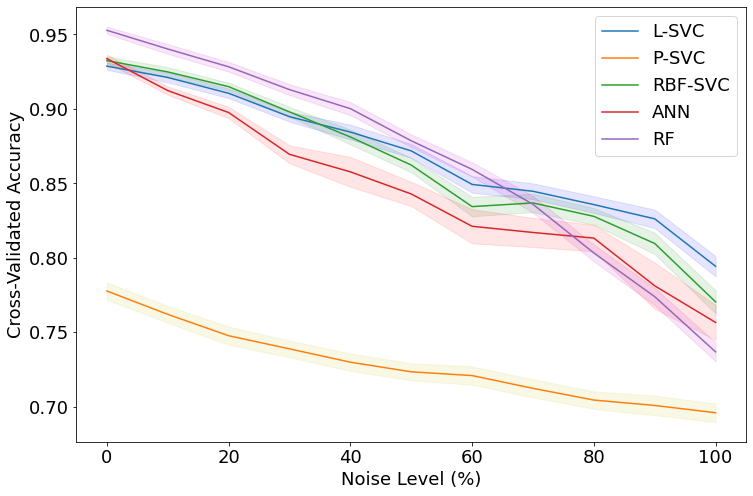

In [198]:
# Accuracy Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_result_ac_spam, label='L-SVC')
plt.fill_between(k_range, (ub_linear_ac_spam), (lb_linear_ac_spam), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, poly_result_ac_spam, label='P-SVC')
plt.fill_between(k_range, (ub_poly_ac_spam), (lb_poly_ac_spam), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, rbf_result_ac_spam, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_ac_spam), (lb_rbf_ac_spam), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, ann_result_ac_spam, label='ANN')
plt.fill_between(k_range, (ub_ann_ac_spam), (lb_ann_ac_spam), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.plot(k_range, rf_result_ac_spam, label='RF')
plt.fill_between(k_range, (ub_rf_ac_spam), (lb_rf_ac_spam), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')

plt.legend()

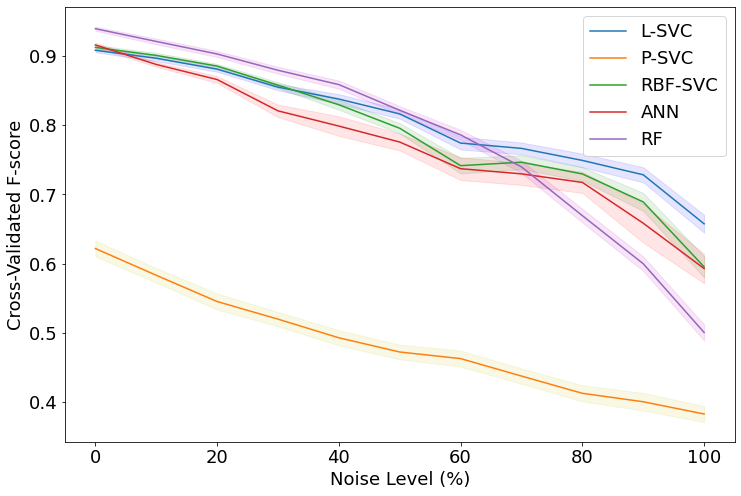

In [199]:
# F1-score Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_result_f1_spam, label='L-SVC')
plt.fill_between(k_range, (ub_linear_f1_spam), (lb_linear_f1_spam), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, poly_result_f1_spam, label='P-SVC')
plt.fill_between(k_range, (ub_poly_f1_spam), (lb_poly_f1_spam), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, rbf_result_f1_spam, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_f1_spam), (lb_rbf_f1_spam), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, ann_result_f1_spam, label='ANN')
plt.fill_between(k_range, (ub_ann_f1_spam), (lb_ann_f1_spam), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.plot(k_range, rf_result_f1_spam, label='RF')
plt.fill_between(k_range, (ub_rf_f1_spam), (lb_rf_f1_spam), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated F-score')

plt.legend()

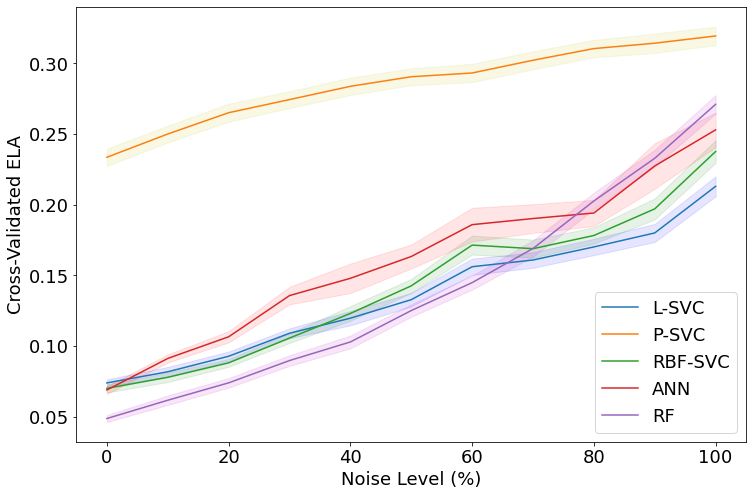

In [200]:
# ELA Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_ela_result_spam, label='L-SVC')
plt.fill_between(k_range, (ub_linear_ela_spam), (lb_linear_ela_spam), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, poly_ela_result_spam, label='P-SVC')
plt.fill_between(k_range, (ub_poly_ela_spam), (lb_poly_ela_spam), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, rbf_ela_result_spam, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_ela_spam), (lb_rbf_ela_spam), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, ann_ela_result_spam, label='ANN')
plt.fill_between(k_range, (ub_ann_ela_spam), (lb_ann_ela_spam), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.plot(k_range, rf_ela_result_spam, label='RF')
plt.fill_between(k_range, (ub_rf_ela_spam), (lb_rf_ela_spam), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated ELA')

plt.legend()

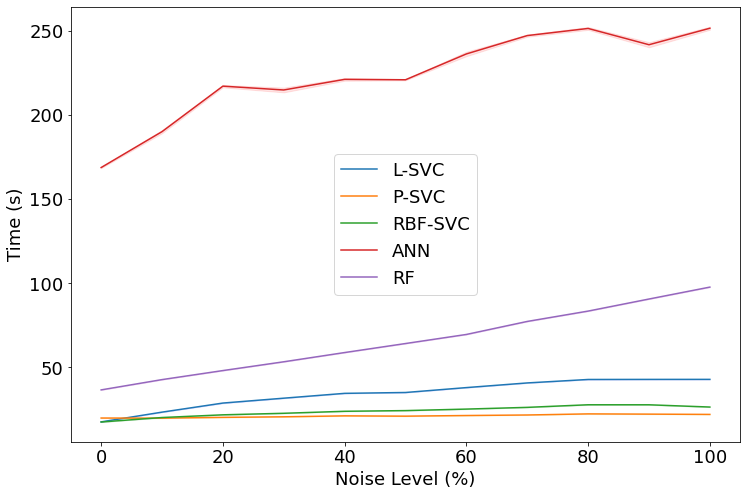

In [201]:
# Time Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, time_linear_sum_spam, label='L-SVC')
plt.fill_between(k_range, (ub_linear_time_spam), (lb_linear_time_spam), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_poly_sum_spam, label='P-SVC')
plt.fill_between(k_range, (ub_poly_time_spam), (lb_poly_time_spam), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_rbf_sum_spam, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_time_spam), (lb_rbf_time_spam), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_ann_sum_spam, label='ANN')
plt.fill_between(k_range, (ub_ann_time_spam), (lb_ann_time_spam), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.plot(k_range, time_rf_sum_spam, label='RF')
plt.fill_between(k_range, (ub_rf_time_spam), (lb_rf_time_spam), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Time (s)')

plt.legend()

In [216]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Accuracy  ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_result_ac_spam[0],3),round(poly_result_ac_spam[0],3),round(rbf_result_ac_spam[0],3),round(ann_result_ac_spam[0],3),round(rf_result_ac_spam[0],3)],
                       [round(linear_result_ac_spam[1],3),round(poly_result_ac_spam[1],3),round(rbf_result_ac_spam[1],3),round(ann_result_ac_spam[1],3),round(rf_result_ac_spam[1],3)],
                       [round(linear_result_ac_spam[2],3),round(poly_result_ac_spam[2],3),round(rbf_result_ac_spam[2],3),round(ann_result_ac_spam[2],3),round(rf_result_ac_spam[2],3)],
                       [round(linear_result_ac_spam[3],3),round(poly_result_ac_spam[3],3),round(rbf_result_ac_spam[3],3),round(ann_result_ac_spam[3],3),round(rf_result_ac_spam[3],3)],
                       [round(linear_result_ac_spam[4],3),round(poly_result_ac_spam[4],3),round(rbf_result_ac_spam[4],3),round(ann_result_ac_spam[4],3),round(rf_result_ac_spam[4],3)],
                       [round(linear_result_ac_spam[5],3),round(poly_result_ac_spam[5],3),round(rbf_result_ac_spam[5],3),round(ann_result_ac_spam[5],3),round(rf_result_ac_spam[5],3)],
                       [round(linear_result_ac_spam[6],3),round(poly_result_ac_spam[6],3),round(rbf_result_ac_spam[6],3),round(ann_result_ac_spam[6],3),round(rf_result_ac_spam[6],3)],
                       [round(linear_result_ac_spam[7],3),round(poly_result_ac_spam[7],3),round(rbf_result_ac_spam[7],3),round(ann_result_ac_spam[7],3),round(rf_result_ac_spam[7],3)],
                       [round(linear_result_ac_spam[8],3),round(poly_result_ac_spam[8],3),round(rbf_result_ac_spam[8],3),round(ann_result_ac_spam[8],3),round(rf_result_ac_spam[8],3)],
                       [round(linear_result_ac_spam[9],3),round(poly_result_ac_spam[9],3),round(rbf_result_ac_spam[9],3),round(ann_result_ac_spam[9],3),round(rf_result_ac_spam[9],3)],
                       [round(linear_result_ac_spam[10],3),round(poly_result_ac_spam[10],3),round(rbf_result_ac_spam[10],3),round(ann_result_ac_spam[10],3),round(rf_result_ac_spam[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['F-score ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_result_f1_spam[0],3),round(poly_result_f1_spam[0],3),round(rbf_result_f1_spam[0],3),round(ann_result_f1_spam[0],3),round(rf_result_f1_spam[0],3)],
                       [round(linear_result_f1_spam[1],3),round(poly_result_f1_spam[1],3),round(rbf_result_f1_spam[1],3),round(ann_result_f1_spam[1],3),round(rf_result_f1_spam[1],3)],
                       [round(linear_result_f1_spam[2],3),round(poly_result_f1_spam[2],3),round(rbf_result_f1_spam[2],3),round(ann_result_f1_spam[2],3),round(rf_result_f1_spam[2],3)],
                       [round(linear_result_f1_spam[3],3),round(poly_result_f1_spam[3],3),round(rbf_result_f1_spam[3],3),round(ann_result_f1_spam[3],3),round(rf_result_f1_spam[3],3)],
                       [round(linear_result_f1_spam[4],3),round(poly_result_f1_spam[4],3),round(rbf_result_f1_spam[4],3),round(ann_result_f1_spam[4],3),round(rf_result_f1_spam[4],3)],
                       [round(linear_result_f1_spam[5],3),round(poly_result_f1_spam[5],3),round(rbf_result_f1_spam[5],3),round(ann_result_f1_spam[5],3),round(rf_result_f1_spam[5],3)],
                       [round(linear_result_f1_spam[6],3),round(poly_result_f1_spam[6],3),round(rbf_result_f1_spam[6],3),round(ann_result_f1_spam[6],3),round(rf_result_f1_spam[6],3)],
                       [round(linear_result_f1_spam[7],3),round(poly_result_f1_spam[7],3),round(rbf_result_f1_spam[7],3),round(ann_result_f1_spam[7],3),round(rf_result_f1_spam[7],3)],
                       [round(linear_result_f1_spam[8],3),round(poly_result_f1_spam[8],3),round(rbf_result_f1_spam[8],3),round(ann_result_f1_spam[8],3),round(rf_result_f1_spam[8],3)],
                       [round(linear_result_f1_spam[9],3),round(poly_result_f1_spam[9],3),round(rbf_result_f1_spam[9],3),round(ann_result_f1_spam[9],3),round(rf_result_f1_spam[9],3)],
                       [round(linear_result_f1_spam[10],3),round(poly_result_f1_spam[10],3),round(rbf_result_f1_spam[10],3),round(ann_result_f1_spam[10],3),round(rf_result_f1_spam[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['ELA ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_ela_result_spam[0],3),round(poly_ela_result_spam[0],3),round(rbf_ela_result_spam[0],3),round(ann_ela_result_spam[0],3),round(rf_ela_result_spam[0],3)],
                       [round(linear_ela_result_spam[1],3),round(poly_ela_result_spam[1],3),round(rbf_ela_result_spam[1],3),round(ann_ela_result_spam[1],3),round(rf_ela_result_spam[1],3)],
                       [round(linear_ela_result_spam[2],3),round(poly_ela_result_spam[2],3),round(rbf_ela_result_spam[2],3),round(ann_ela_result_spam[2],3),round(rf_ela_result_spam[2],3)],
                       [round(linear_ela_result_spam[3],3),round(poly_ela_result_spam[3],3),round(rbf_ela_result_spam[3],3),round(ann_ela_result_spam[3],3),round(rf_ela_result_spam[3],3)],
                       [round(linear_ela_result_spam[4],3),round(poly_ela_result_spam[4],3),round(rbf_ela_result_spam[4],3),round(ann_ela_result_spam[4],3),round(rf_ela_result_spam[4],3)],
                       [round(linear_ela_result_spam[5],3),round(poly_ela_result_spam[5],3),round(rbf_ela_result_spam[5],3),round(ann_ela_result_spam[5],3),round(rf_ela_result_spam[5],3)],
                       [round(linear_ela_result_spam[6],3),round(poly_ela_result_spam[6],3),round(rbf_ela_result_spam[6],3),round(ann_ela_result_spam[6],3),round(rf_ela_result_spam[6],3)],
                       [round(linear_ela_result_spam[7],3),round(poly_ela_result_spam[7],3),round(rbf_ela_result_spam[7],3),round(ann_ela_result_spam[7],3),round(rf_ela_result_spam[7],3)],
                       [round(linear_ela_result_spam[8],3),round(poly_ela_result_spam[8],3),round(rbf_ela_result_spam[8],3),round(ann_ela_result_spam[8],3),round(rf_ela_result_spam[8],3)],
                       [round(linear_ela_result_spam[9],3),round(poly_ela_result_spam[9],3),round(rbf_ela_result_spam[9],3),round(ann_ela_result_spam[9],3),round(rf_ela_result_spam[9],3)],
                       [round(linear_ela_result_spam[10],3),round(poly_ela_result_spam[10],3),round(rbf_ela_result_spam[10],3),round(ann_ela_result_spam[10],3),round(rf_ela_result_spam[10],3)]
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Time (s)',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(time_linear_sum_spam[0],3),round(time_poly_sum_spam[0],3),round(time_rbf_sum_spam[0],3),round(time_ann_sum_spam[0],3),round(time_rf_sum_spam[0],3)],
                       [round(time_linear_sum_spam[1],3),round(time_poly_sum_spam[1],3),round(time_rbf_sum_spam[1],3),round(time_ann_sum_spam[1],3),round(time_rf_sum_spam[1],3)],
                       [round(time_linear_sum_spam[2],3),round(time_poly_sum_spam[2],3),round(time_rbf_sum_spam[2],3),round(time_ann_sum_spam[2],3),round(time_rf_sum_spam[2],3)],
                       [round(time_linear_sum_spam[3],3),round(time_poly_sum_spam[3],3),round(time_rbf_sum_spam[3],3),round(time_ann_sum_spam[3],3),round(time_rf_sum_spam[3],3)],
                       [round(time_linear_sum_spam[4],3),round(time_poly_sum_spam[4],3),round(time_rbf_sum_spam[4],3),round(time_ann_sum_spam[4],3),round(time_rf_sum_spam[4],3)],
                       [round(time_linear_sum_spam[5],3),round(time_poly_sum_spam[5],3),round(time_rbf_sum_spam[5],3),round(time_ann_sum_spam[5],3),round(time_rf_sum_spam[5],3)],
                       [round(time_linear_sum_spam[6],3),round(time_poly_sum_spam[6],3),round(time_rbf_sum_spam[6],3),round(time_ann_sum_spam[6],3),round(time_rf_sum_spam[6],3)],
                       [round(time_linear_sum_spam[7],3),round(time_poly_sum_spam[7],3),round(time_rbf_sum_spam[7],3),round(time_ann_sum_spam[7],3),round(time_rf_sum_spam[7],3)],
                       [round(time_linear_sum_spam[8],3),round(time_poly_sum_spam[8],3),round(time_rbf_sum_spam[8],3),round(time_ann_sum_spam[8],3),round(time_rf_sum_spam[8],3)],
                       [round(time_linear_sum_spam[9],3),round(time_poly_sum_spam[9],3),round(time_rbf_sum_spam[9],3),round(time_ann_sum_spam[9],3),round(time_rf_sum_spam[9],3)],
                       [round(time_linear_sum_spam[10],3),round(time_poly_sum_spam[10],3),round(time_rbf_sum_spam[10],3),round(time_ann_sum_spam[10],3),round(time_rf_sum_spam[10],3)]
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Classifier','Total Time (s)'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(sum(time_linear_sum_spam),3),round(sum(time_poly_sum_spam),3),round(sum(time_rbf_sum_spam),3),round(sum(time_ann_sum_spam),3),round(sum(time_rf_sum_spam),3)],
                       ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

# Average

In [203]:
linear_ac_average = []
poly_ac_average = []
rbf_ac_average = []
ann_ac_average = []
rf_ac_average = []

linear_f1_average = []
poly_f1_average = []
rbf_f1_average = []
ann_f1_average = []
rf_f1_average = []

linear_ela_average = []
poly_ela_average = []
rbf_ela_average = []
ann_ela_average = []
rf_ela_average = []

linear_time_average = []
poly_time_average = []
rbf_time_average = []
ann_time_average = []
rf_time_average = []

In [204]:
for i in range(11):
    linear_ac_average.append((linear_result_ac_bc[i]+linear_result_ac_banknote[i]
                             +linear_result_ac_diabetes[i]+linear_result_ac_spam[i])/4)
    poly_ac_average.append((poly_result_ac_bc[i]+poly_result_ac_banknote[i]
                             +poly_result_ac_diabetes[i]+poly_result_ac_spam[i])/4)
    rbf_ac_average.append((rbf_result_ac_bc[i]+rbf_result_ac_banknote[i]
                             +rbf_result_ac_diabetes[i]+rbf_result_ac_spam[i])/4)
    ann_ac_average.append((ann_result_ac_bc[i]+ann_result_ac_banknote[i]
                             +ann_result_ac_diabetes[i]+ann_result_ac_spam[i])/4)
    rf_ac_average.append((rf_result_ac_bc[i]+rf_result_ac_banknote[i]
                             +rf_result_ac_diabetes[i]+rf_result_ac_spam[i])/4)
    
    linear_f1_average.append((linear_result_f1_bc[i]+linear_result_f1_banknote[i]
                             +linear_result_f1_diabetes[i]+linear_result_f1_spam[i])/4)
    poly_f1_average.append((poly_result_f1_bc[i]+poly_result_f1_banknote[i]
                             +poly_result_f1_diabetes[i]+poly_result_f1_spam[i])/4)
    rbf_f1_average.append((rbf_result_f1_bc[i]+rbf_result_f1_banknote[i]
                             +rbf_result_f1_diabetes[i]+rbf_result_f1_spam[i])/4)
    ann_f1_average.append((ann_result_f1_bc[i]+ann_result_f1_banknote[i]
                             +ann_result_f1_diabetes[i]+ann_result_f1_spam[i])/4)
    rf_f1_average.append((rf_result_f1_bc[i]+rf_result_f1_banknote[i]
                             +rf_result_f1_diabetes[i]+rf_result_f1_spam[i])/4)
    
    linear_ela_average.append((linear_ela_result_bc[i]+linear_ela_result_banknote[i]
                             +linear_ela_result_diabetes[i]+linear_ela_result_spam[i])/4)
    poly_ela_average.append((poly_ela_result_bc[i]+poly_ela_result_banknote[i]
                             +poly_ela_result_diabetes[i]+poly_ela_result_spam[i])/4)
    rbf_ela_average.append((rbf_ela_result_bc[i]+rbf_ela_result_banknote[i]
                             +rbf_ela_result_diabetes[i]+rbf_ela_result_spam[i])/4)
    ann_ela_average.append((ann_ela_result_bc[i]+ann_ela_result_banknote[i]
                             +ann_ela_result_diabetes[i]+ann_ela_result_spam[i])/4)
    rf_ela_average.append((rf_ela_result_bc[i]+rf_ela_result_banknote[i]
                             +rf_ela_result_diabetes[i]+rf_ela_result_spam[i])/4)
    
    linear_time_average.append((time_linear_sum_bc[i]+time_linear_sum_banknote[i]
                             +time_linear_sum_diabetes[i]+time_linear_sum_spam[i])/4)
    poly_time_average.append((time_poly_sum_bc[i]+time_poly_sum_banknote[i]
                             +time_poly_sum_diabetes[i]+time_poly_sum_spam[i])/4)
    rbf_time_average.append((time_rbf_sum_bc[i]+time_rbf_sum_banknote[i]
                             +time_rbf_sum_diabetes[i]+time_rbf_sum_spam[i])/4)
    ann_time_average.append((time_ann_sum_bc[i]+time_ann_sum_banknote[i]
                             +time_ann_sum_diabetes[i]+time_ann_sum_spam[i])/4)
    rf_time_average.append((time_rf_sum_bc[i]+time_rf_sum_banknote[i]
                             +time_rf_sum_diabetes[i]+time_rf_sum_spam[i])/4)
    

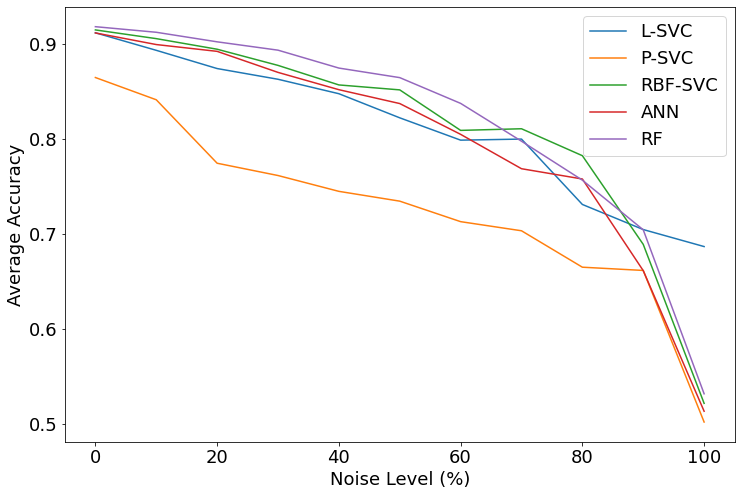

In [205]:
# Average accuracy Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_ac_average, label='L-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Accuracy')

plt.plot(k_range, poly_ac_average, label='P-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validationed Accuracy')

plt.plot(k_range, rbf_ac_average, label='RBF-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Accuracy')

plt.plot(k_range, ann_ac_average, label='ANN')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Accuracy')

plt.plot(k_range, rf_ac_average, label='RF')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Accuracy')

plt.legend()

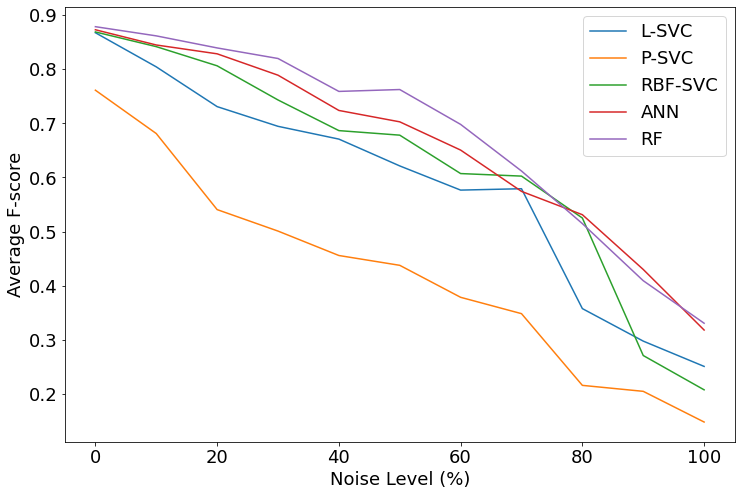

In [206]:
# Average f1-score Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_f1_average, label='L-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average F-score')

plt.plot(k_range, poly_f1_average, label='P-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average F-score')

plt.plot(k_range, rbf_f1_average, label='RBF-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average F-score')

plt.plot(k_range, ann_f1_average, label='ANN')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average F-score')

plt.plot(k_range, rf_f1_average, label='RF')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average F-score')

plt.legend()

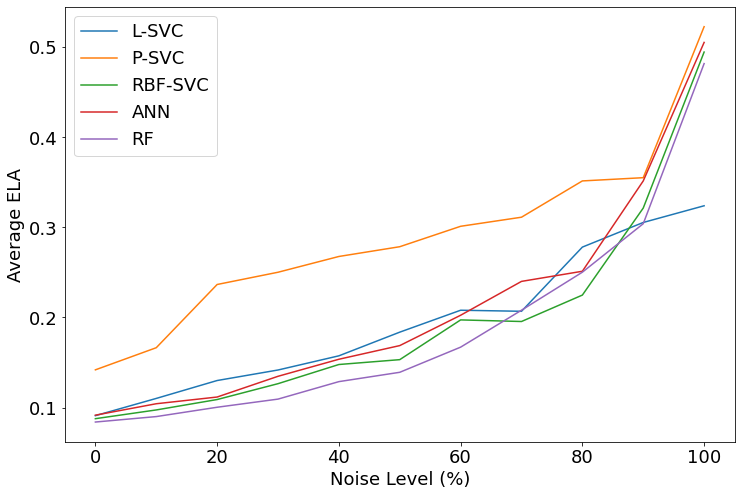

In [207]:
# Average ela Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_ela_average, label='L-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average ELA')

plt.plot(k_range, poly_ela_average, label='P-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average ELA')

plt.plot(k_range, rbf_ela_average, label='RBF-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average ELA')

plt.plot(k_range, ann_ela_average, label='ANN')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average ELA')

plt.plot(k_range, rf_ela_average, label='RF')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average ELA')

plt.legend()

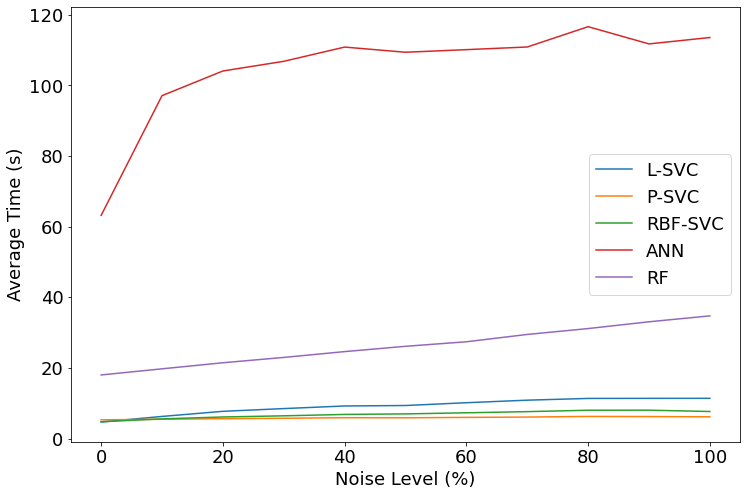

In [208]:
# Average time Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_time_average, label='L-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Time (s)')

plt.plot(k_range, poly_time_average, label='P-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Time (s)')

plt.plot(k_range, rbf_time_average, label='RBF-SVC')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Time (s)')

plt.plot(k_range, ann_time_average, label='ANN')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Time (s)')

plt.plot(k_range, rf_time_average, label='RF')
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Time (s)')

plt.legend()

In [217]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Average Accuracy  ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_ac_average[0],3),round(poly_ac_average[0],3),round(rbf_ac_average[0],3),round(ann_ac_average[0],3),round(rf_ac_average[0],3)],
                       [round(linear_ac_average[1],3),round(poly_ac_average[1],3),round(rbf_ac_average[1],3),round(ann_ac_average[1],3),round(rf_ac_average[1],3)],
                       [round(linear_ac_average[2],3),round(poly_ac_average[2],3),round(rbf_ac_average[2],3),round(ann_ac_average[2],3),round(rf_ac_average[2],3)],
                       [round(linear_ac_average[3],3),round(poly_ac_average[3],3),round(rbf_ac_average[3],3),round(ann_ac_average[3],3),round(rf_ac_average[3],3)],
                       [round(linear_ac_average[4],3),round(poly_ac_average[4],3),round(rbf_ac_average[4],3),round(ann_ac_average[4],3),round(rf_ac_average[4],3)],
                       [round(linear_ac_average[5],3),round(poly_ac_average[5],3),round(rbf_ac_average[5],3),round(ann_ac_average[5],3),round(rf_ac_average[5],3)],
                       [round(linear_ac_average[6],3),round(poly_ac_average[6],3),round(rbf_ac_average[6],3),round(ann_ac_average[6],3),round(rf_ac_average[6],3)],
                       [round(linear_ac_average[7],3),round(poly_ac_average[7],3),round(rbf_ac_average[7],3),round(ann_ac_average[7],3),round(rf_ac_average[7],3)],
                       [round(linear_ac_average[8],3),round(poly_ac_average[8],3),round(rbf_ac_average[8],3),round(ann_ac_average[8],3),round(rf_ac_average[8],3)],
                       [round(linear_ac_average[9],3),round(poly_ac_average[9],3),round(rbf_ac_average[9],3),round(ann_ac_average[9],3),round(rf_ac_average[9],3)],
                       [round(linear_ac_average[10],3),round(poly_ac_average[10],3),round(rbf_ac_average[10],3),round(ann_ac_average[10],3),round(rf_ac_average[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

In [218]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Average F-score  ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_f1_average[0],3),round(poly_f1_average[0],3),round(rbf_f1_average[0],3),round(ann_f1_average[0],3),round(rf_f1_average[0],3)],
                       [round(linear_f1_average[1],3),round(poly_f1_average[1],3),round(rbf_f1_average[1],3),round(ann_f1_average[1],3),round(rf_f1_average[1],3)],
                       [round(linear_f1_average[2],3),round(poly_f1_average[2],3),round(rbf_f1_average[2],3),round(ann_f1_average[2],3),round(rf_f1_average[2],3)],
                       [round(linear_f1_average[3],3),round(poly_f1_average[3],3),round(rbf_f1_average[3],3),round(ann_f1_average[3],3),round(rf_f1_average[3],3)],
                       [round(linear_f1_average[4],3),round(poly_f1_average[4],3),round(rbf_f1_average[4],3),round(ann_f1_average[4],3),round(rf_f1_average[4],3)],
                       [round(linear_f1_average[5],3),round(poly_f1_average[5],3),round(rbf_f1_average[5],3),round(ann_f1_average[5],3),round(rf_f1_average[5],3)],
                       [round(linear_f1_average[6],3),round(poly_f1_average[6],3),round(rbf_f1_average[6],3),round(ann_f1_average[6],3),round(rf_f1_average[6],3)],
                       [round(linear_f1_average[7],3),round(poly_f1_average[7],3),round(rbf_f1_average[7],3),round(ann_f1_average[7],3),round(rf_f1_average[7],3)],
                       [round(linear_f1_average[8],3),round(poly_f1_average[8],3),round(rbf_f1_average[8],3),round(ann_f1_average[8],3),round(rf_f1_average[8],3)],
                       [round(linear_f1_average[9],3),round(poly_f1_average[9],3),round(rbf_f1_average[9],3),round(ann_f1_average[9],3),round(rf_f1_average[9],3)],
                       [round(linear_f1_average[10],3),round(poly_f1_average[10],3),round(rbf_f1_average[10],3),round(ann_f1_average[10],3),round(rf_f1_average[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

In [219]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Average ELA  ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_ela_average[0],3),round(poly_ela_average[0],3),round(rbf_ela_average[0],3),round(ann_ela_average[0],3),round(rf_ela_average[0],3)],
                       [round(linear_ela_average[1],3),round(poly_ela_average[1],3),round(rbf_ela_average[1],3),round(ann_ela_average[1],3),round(rf_ela_average[1],3)],
                       [round(linear_ela_average[2],3),round(poly_ela_average[2],3),round(rbf_ela_average[2],3),round(ann_ela_average[2],3),round(rf_ela_average[2],3)],
                       [round(linear_ela_average[3],3),round(poly_ela_average[3],3),round(rbf_ela_average[3],3),round(ann_ela_average[3],3),round(rf_ela_average[3],3)],
                       [round(linear_ela_average[4],3),round(poly_ela_average[4],3),round(rbf_ela_average[4],3),round(ann_ela_average[4],3),round(rf_ela_average[4],3)],
                       [round(linear_ela_average[5],3),round(poly_ela_average[5],3),round(rbf_ela_average[5],3),round(ann_ela_average[5],3),round(rf_ela_average[5],3)],
                       [round(linear_ela_average[6],3),round(poly_ela_average[6],3),round(rbf_ela_average[6],3),round(ann_ela_average[6],3),round(rf_ela_average[6],3)],
                       [round(linear_ela_average[7],3),round(poly_ela_average[7],3),round(rbf_ela_average[7],3),round(ann_ela_average[7],3),round(rf_ela_average[7],3)],
                       [round(linear_ela_average[8],3),round(poly_ela_average[8],3),round(rbf_ela_average[8],3),round(ann_ela_average[8],3),round(rf_ela_average[8],3)],
                       [round(linear_ela_average[9],3),round(poly_ela_average[9],3),round(rbf_ela_average[9],3),round(ann_ela_average[9],3),round(rf_ela_average[9],3)],
                       [round(linear_ela_average[10],3),round(poly_ela_average[10],3),round(rbf_ela_average[10],3),round(ann_ela_average[10],3),round(rf_ela_average[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

In [220]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Average Time (s) ',' 0% ',' 10% ',' 20% ',' 30% ',' 40% ',' 50% ',' 60% ',' 70% ',' 80% ',' 90% ',' 100% '],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['L-SVC', 'P-SVC', 'RBF-SVC', 'ANN', 'RF'], # 1st column
                       [round(linear_time_average[0],3),round(poly_time_average[0],3),round(rbf_time_average[0],3),round(ann_time_average[0],3),round(rf_time_average[0],3)],
                       [round(linear_time_average[1],3),round(poly_time_average[1],3),round(rbf_time_average[1],3),round(ann_time_average[1],3),round(rf_time_average[1],3)],
                       [round(linear_time_average[2],3),round(poly_time_average[2],3),round(rbf_time_average[2],3),round(ann_time_average[2],3),round(rf_time_average[2],3)],
                       [round(linear_time_average[3],3),round(poly_time_average[3],3),round(rbf_time_average[3],3),round(ann_time_average[3],3),round(rf_time_average[3],3)],
                       [round(linear_time_average[4],3),round(poly_time_average[4],3),round(rbf_time_average[4],3),round(ann_time_average[4],3),round(rf_time_average[4],3)],
                       [round(linear_time_average[5],3),round(poly_time_average[5],3),round(rbf_time_average[5],3),round(ann_time_average[5],3),round(rf_time_average[5],3)],
                       [round(linear_time_average[6],3),round(poly_time_average[6],3),round(rbf_time_average[6],3),round(ann_time_average[6],3),round(rf_time_average[6],3)],
                       [round(linear_time_average[7],3),round(poly_time_average[7],3),round(rbf_time_average[7],3),round(ann_time_average[7],3),round(rf_time_average[7],3)],
                       [round(linear_time_average[8],3),round(poly_time_average[8],3),round(rbf_time_average[8],3),round(ann_time_average[8],3),round(rf_time_average[8],3)],
                       [round(linear_time_average[9],3),round(poly_time_average[9],3),round(rbf_time_average[9],3),round(ann_time_average[9],3),round(rf_time_average[9],3)],
                       [round(linear_time_average[10],3),round(poly_time_average[10],3),round(rbf_time_average[10],3),round(ann_time_average[10],3),round(rf_time_average[10],3)]
                       ], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.show()

In [62]:
ci_zero = []
ci_zero.append(linear_result_ac_bc[0])
ci_zero.append(linear_result_ac_banknote[0])
ci_zero.append(linear_result_ac_diabetes[0])
ci_zero.append(linear_result_ac_spam[0])

In [70]:
ci_std = np.std(ci_zero)
ci_mean = np.mean(ci_zero)

In [73]:
1.96*ci_std/2

0.08464348884548707

In [74]:
ci_mean + 1.96*ci_std/2

0.9823826830633202

In [75]:
ci_mean - 1.96*ci_std/2

0.813095705372346

In [76]:
ci_zero

[0.9691176470588235, 0.9832116788321168, 0.7686274509803922, 0.87]

In [77]:
test = [20, 2, 7, 1, 34]
#std of arr :  12.576167937809991

np.std(test)

12.576167937809991

In [95]:
linear_ci = [linear_result_ac_bc,linear_result_ac_banknote,linear_result_ac_diabetes,linear_result_ac_spam]
linear_ci

[[0.9691176470588235,
  0.9573529411764706,
  0.9455882352941176,
  0.9455882352941176,
  0.9397058823529412,
  0.9220588235294118,
  0.9029411764705882,
  0.8397058823529412,
  0.6529411764705882,
  0.6529411764705882,
  0.3514705882352941],
 [0.9832116788321168,
  0.962043795620438,
  0.9218978102189781,
  0.7766423357664234,
  0.6795620437956205,
  0.6175182481751824,
  0.5948905109489051,
  0.6036496350364964,
  0.572992700729927,
  0.5664233576642336,
  0.5525547445255474],
 [0.7686274509803922,
  0.7098039215686275,
  0.6797385620915033,
  0.661437908496732,
  0.6549019607843137,
  0.6522875816993464,
  0.6496732026143791,
  0.6496732026143791,
  0.6509803921568628,
  0.6509803921568628,
  0.6509803921568628],
 [0.87,
  0.8606521739130435,
  0.8454347826086956,
  0.8256521739130435,
  0.8123913043478261,
  0.8028260869565217,
  0.7784782608695652,
  0.7571739130434783,
  0.76,
  0.7352173913043478,
  0.73]]

<AxesSubplot:>

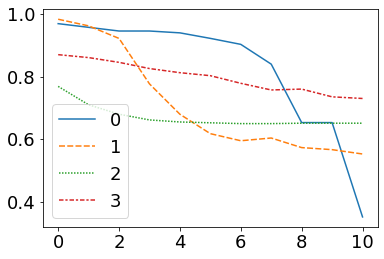

In [96]:
sns.lineplot(data=linear_ci)

In [98]:
df_ci = pd.DataFrame(data=linear_ci, columns=["0%","10%","20%","30%","40%","50%","60%",
                                                                     "70%","80%","90%","100%"])

In [99]:
df_ci

,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,0.969118,0.957353,0.945588,0.945588,0.939706,0.922059,0.902941,0.839706,0.652941,0.652941,0.351471
1,0.983212,0.962044,0.921898,0.776642,0.679562,0.617518,0.594891,0.603650,0.572993,0.566423,0.552555
2,0.768627,0.709804,0.679739,0.661438,0.654902,0.652288,0.649673,0.649673,0.650980,0.650980,0.650980
3,0.870000,0.860652,0.845435,0.825652,0.812391,0.802826,0.778478,0.757174,0.760000,0.735217,0.730000


In [134]:
cis_linear_ac = []
cis_poly_ac = []
cis_rbf_ac = []
cis_ann_ac = []
cis_rf_ac = []

cis_linear_f1 = []
cis_poly_f1 = []
cis_rbf_f1 = []
cis_ann_f1 = []
cis_rf_f1 = []

cis_linear_ela = []
cis_poly_ela = []
cis_rbf_ela = []
cis_ann_ela = []
cis_rf_ela = []

cis_linear_time = []
cis_poly_time = []
cis_rbf_time = []
cis_ann_time = []
cis_rf_time = []


for i in range(11):
    #ac
    ci_linear_ac = [linear_result_ac_bc[i],linear_result_ac_banknote[i],linear_result_ac_diabetes[i],linear_result_ac_spam[i]]
    ci_poly_ac = [poly_result_ac_bc[i],poly_result_ac_banknote[i],poly_result_ac_diabetes[i],poly_result_ac_spam[i]]
    ci_rbf_ac = [rbf_result_ac_bc[i],rbf_result_ac_banknote[i],rbf_result_ac_diabetes[i],rbf_result_ac_spam[i]]
    ci_ann_ac = [ann_result_ac_bc[i],ann_result_ac_banknote[i],ann_result_ac_diabetes[i],ann_result_ac_spam[i]]
    ci_rf_ac = [rf_result_ac_bc[i],rf_result_ac_banknote[i],rf_result_ac_diabetes[i],rf_result_ac_spam[i]]

    ci_std_linear_ac = np.std(ci_linear_ac)
    ci_std_poly_ac = np.std(ci_poly_ac)
    ci_std_rbf_ac = np.std(ci_rbf_ac)
    ci_std_ann_ac = np.std(ci_ann_ac)
    ci_std_rf_ac = np.std(ci_rf_ac)

    cis_linear_ac.append(1.96*ci_std_linear_ac/2)
    cis_poly_ac.append(1.96*ci_std_poly_ac/2)
    cis_rbf_ac.append(1.96*ci_std_rbf_ac/2)
    cis_ann_ac.append(1.96*ci_std_ann_ac/2)
    cis_rf_ac.append(1.96*ci_std_rf_ac/2)
    
    #f1
    ci_linear_f1 = [linear_result_f1_bc[i],linear_result_f1_banknote[i],linear_result_f1_diabetes[i],linear_result_f1_spam[i]]
    ci_poly_f1 = [poly_result_f1_bc[i],poly_result_f1_banknote[i],poly_result_f1_diabetes[i],poly_result_f1_spam[i]]
    ci_rbf_f1 = [rbf_result_f1_bc[i],rbf_result_f1_banknote[i],rbf_result_f1_diabetes[i],rbf_result_f1_spam[i]]
    ci_ann_f1 = [ann_result_f1_bc[i],ann_result_f1_banknote[i],ann_result_f1_diabetes[i],ann_result_f1_spam[i]]
    ci_rf_f1 = [rf_result_f1_bc[i],rf_result_f1_banknote[i],rf_result_f1_diabetes[i],rf_result_f1_spam[i]]

    ci_std_linear_f1 = np.std(ci_linear_f1)
    ci_std_poly_f1 = np.std(ci_poly_f1)
    ci_std_rbf_f1 = np.std(ci_rbf_f1)
    ci_std_ann_f1 = np.std(ci_ann_f1)
    ci_std_rf_f1 = np.std(ci_rf_f1)

    cis_linear_f1.append(1.96*ci_std_linear_f1/2)
    cis_poly_f1.append(1.96*ci_std_poly_f1/2)
    cis_rbf_f1.append(1.96*ci_std_rbf_f1/2)
    cis_ann_f1.append(1.96*ci_std_ann_f1/2)
    cis_rf_f1.append(1.96*ci_std_rf_f1/2)
    
    #ela
    ci_linear_ela = [linear_ela_result_bc[i],linear_ela_result_banknote[i],linear_ela_result_diabetes[i],linear_ela_result_spam[i]]
    ci_poly_ela = [poly_ela_result_bc[i],poly_ela_result_banknote[i],poly_ela_result_diabetes[i],poly_ela_result_spam[i]]
    ci_rbf_ela = [rbf_ela_result_bc[i],rbf_ela_result_banknote[i],rbf_ela_result_diabetes[i],rbf_ela_result_spam[i]]
    ci_ann_ela = [ann_ela_result_bc[i],ann_ela_result_banknote[i],ann_ela_result_diabetes[i],ann_ela_result_spam[i]]
    ci_rf_ela = [rf_ela_result_bc[i],rf_ela_result_banknote[i],rf_ela_result_diabetes[i],rf_ela_result_spam[i]]

    ci_std_linear_ela = np.std(ci_linear_ela)
    ci_std_poly_ela = np.std(ci_poly_ela)
    ci_std_rbf_ela = np.std(ci_rbf_ela)
    ci_std_ann_ela = np.std(ci_ann_ela)
    ci_std_rf_ela = np.std(ci_rf_ela)

    cis_linear_ela.append(1.96*ci_std_linear_ela/2)
    cis_poly_ela.append(1.96*ci_std_poly_ela/2)
    cis_rbf_ela.append(1.96*ci_std_rbf_ela/2)
    cis_ann_ela.append(1.96*ci_std_ann_ela/2)
    cis_rf_ela.append(1.96*ci_std_rf_ela/2)
    
    #Time
    ci_linear_time = [time_linear_sum_bc[i],time_linear_sum_banknote[i],time_linear_sum_diabetes[i],time_linear_sum_spam[i]]
    ci_poly_time = [time_poly_sum_bc[i],time_poly_sum_banknote[i],time_poly_sum_diabetes[i],time_poly_sum_spam[i]]
    ci_rbf_time = [time_rbf_sum_bc[i],time_rbf_sum_banknote[i],time_rbf_sum_diabetes[i],time_rbf_sum_spam[i]]
    ci_ann_time = [time_ann_sum_bc[i],time_ann_sum_banknote[i],time_ann_sum_diabetes[i],time_ann_sum_spam[i]]
    ci_rf_time = [time_rf_sum_bc[i],time_rf_sum_banknote[i],time_rf_sum_diabetes[i],time_rf_sum_spam[i]]

    ci_std_linear_time = np.std(ci_linear_time)
    ci_std_poly_time = np.std(ci_poly_time)
    ci_std_rbf_time = np.std(ci_rbf_time)
    ci_std_ann_time = np.std(ci_ann_time)
    ci_std_rf_time = np.std(ci_rf_time)

    cis_linear_time.append(1.96*ci_std_linear_time/2)
    cis_poly_time.append(1.96*ci_std_poly_time/2)
    cis_rbf_time.append(1.96*ci_std_rbf_time/2)
    cis_ann_time.append(1.96*ci_std_ann_time/2)
    cis_rf_time.append(1.96*ci_std_rf_time/2)

In [143]:
ub_linear_ac = np.add(linear_ac_average,cis_linear_ac)
ub_poly_ac = np.add(poly_ac_average,cis_poly_ac)
ub_rbf_ac = np.add(rbf_ac_average,cis_rbf_ac)
ub_ann_ac = np.add(ann_ac_average,cis_ann_ac)
ub_rf_ac = np.add(rf_ac_average,cis_rf_ac)
lb_linear_ac = np.subtract(linear_ac_average,cis_linear_ac)
lb_poly_ac = np.subtract(poly_ac_average,cis_poly_ac)
lb_rbf_ac = np.subtract(rbf_ac_average,cis_rbf_ac)
lb_ann_ac = np.subtract(ann_ac_average,cis_ann_ac)
lb_rf_ac = np.subtract(rf_ac_average,cis_rf_ac)

ub_linear_f1 = np.add(linear_f1_average,cis_linear_f1)
ub_poly_f1 = np.add(poly_f1_average,cis_poly_f1)
ub_rbf_f1 = np.add(rbf_f1_average,cis_rbf_f1)
ub_ann_f1 = np.add(ann_f1_average,cis_ann_f1)
ub_rf_f1 = np.add(rf_f1_average,cis_rf_f1)
lb_linear_f1 = np.subtract(linear_f1_average,cis_linear_f1)
lb_poly_f1 = np.subtract(poly_f1_average,cis_poly_f1)
lb_rbf_f1 = np.subtract(rbf_f1_average,cis_rbf_f1)
lb_ann_f1 = np.subtract(ann_f1_average,cis_ann_f1)
lb_rf_f1 = np.subtract(rf_f1_average,cis_rf_f1)

ub_linear_ela = np.add(linear_ela_average,cis_linear_ela)
ub_poly_ela = np.add(poly_ela_average,cis_poly_ela)
ub_rbf_ela = np.add(rbf_ela_average,cis_rbf_ela)
ub_ann_ela = np.add(ann_ela_average,cis_ann_ela)
ub_rf_ela = np.add(rf_ela_average,cis_rf_ela)
lb_linear_ela = np.subtract(linear_ela_average,cis_linear_ela)
lb_poly_ela = np.subtract(poly_ela_average,cis_poly_ela)
lb_rbf_ela = np.subtract(rbf_ela_average,cis_rbf_ela)
lb_ann_ela = np.subtract(ann_ela_average,cis_ann_ela)
lb_rf_ela = np.subtract(rf_ela_average,cis_rf_ela)

ub_linear_time = np.add(linear_time_average,cis_linear_time)
ub_poly_time = np.add(poly_time_average,cis_poly_time)
ub_rbf_time = np.add(rbf_time_average,cis_rbf_time)
ub_ann_time = np.add(ann_time_average,cis_ann_time)
ub_rf_time = np.add(rf_time_average,cis_rf_time)
lb_linear_time = np.subtract(linear_time_average,cis_linear_time)
lb_poly_time = np.subtract(poly_time_average,cis_poly_time)
lb_rbf_time = np.subtract(rbf_time_average,cis_rbf_time)
lb_ann_time = np.subtract(ann_time_average,cis_ann_time)
lb_rf_time = np.subtract(rf_time_average,cis_rf_time)

In [ ]:
plt.fill_between(k_range, (ub_linear_ac), (lb_linear_ac), color='b', alpha=.1)


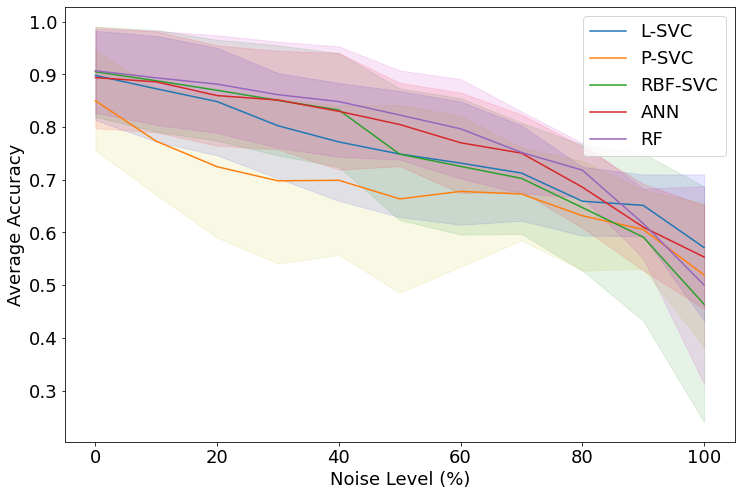

In [145]:
# Average accuracy Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_ac_average, label='L-SVC')
plt.fill_between(k_range, (ub_linear_ac), (lb_linear_ac), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Accuracy')

plt.plot(k_range, poly_ac_average, label='P-SVC')
plt.fill_between(k_range, (ub_poly_ac), (lb_poly_ac), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Accuracy')

plt.plot(k_range, rbf_ac_average, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_ac), (lb_rbf_ac), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Accuracy')

plt.plot(k_range, ann_ac_average, label='ANN')
plt.fill_between(k_range, (ub_ann_ac), (lb_ann_ac), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Accuracy')

plt.plot(k_range, rf_ac_average, label='RF')
plt.fill_between(k_range, (ub_rf_ac), (lb_rf_ac), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Accuracy')

plt.legend()

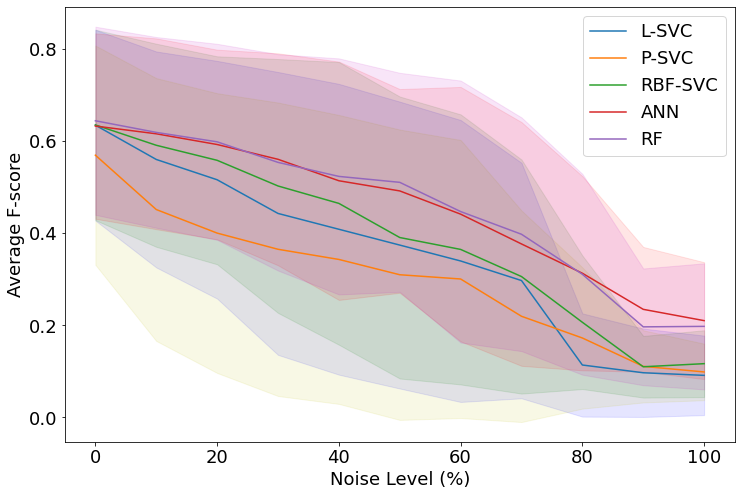

In [150]:
# F-score Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_f1_average, label='L-SVC')
plt.fill_between(k_range, (ub_linear_f1), (lb_linear_f1), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average F-score')

plt.plot(k_range, poly_f1_average, label='P-SVC')
plt.fill_between(k_range, (ub_poly_f1), (lb_poly_f1), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average F-score')

plt.plot(k_range, rbf_f1_average, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_f1), (lb_rbf_f1), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average F-sore')

plt.plot(k_range, ann_f1_average, label='ANN')
plt.fill_between(k_range, (ub_ann_f1), (lb_ann_f1), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average F-score')

plt.plot(k_range, rf_f1_average, label='RF')
plt.fill_between(k_range, (ub_rf_f1), (lb_rf_f1), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average F-score')

plt.legend()

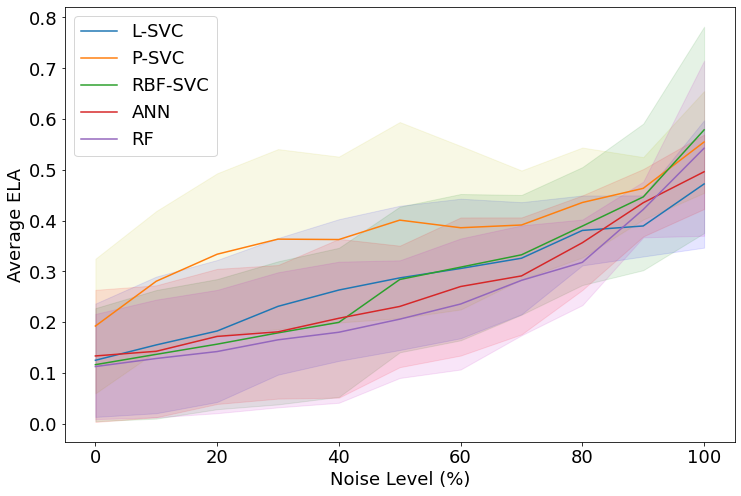

In [151]:
# Average ELA Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_ela_average, label='L-SVC')
plt.fill_between(k_range, (ub_linear_ela), (lb_linear_ela), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average ELA')

plt.plot(k_range, poly_ela_average, label='P-SVC')
plt.fill_between(k_range, (ub_poly_ela), (lb_poly_ela), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average ELA')

plt.plot(k_range, rbf_ela_average, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_ela), (lb_rbf_ela), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average ELA')

plt.plot(k_range, ann_ela_average, label='ANN')
plt.fill_between(k_range, (ub_ann_ela), (lb_ann_ela), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average ELA')

plt.plot(k_range, rf_ela_average, label='RF')
plt.fill_between(k_range, (ub_rf_ela), (lb_rf_ela), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average ELA')

plt.legend()

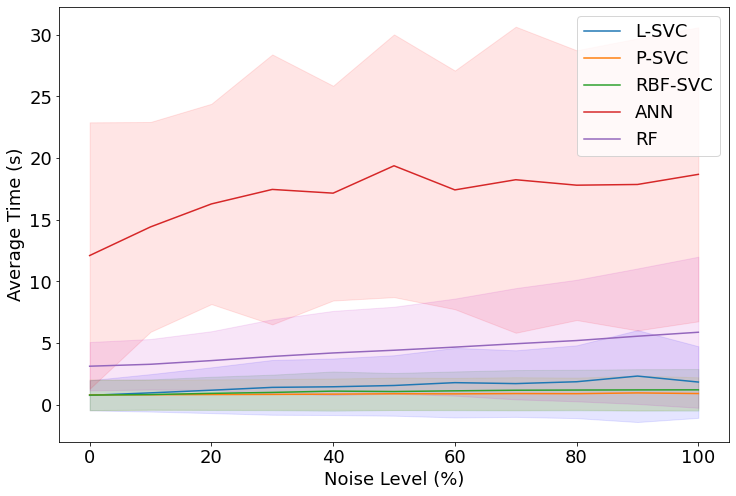

In [152]:
# Average time Graph 
%matplotlib inline

k_range = range(0,110,10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, linear_time_average, label='L-SVC')
plt.fill_between(k_range, (ub_linear_time), (lb_linear_time), color='b', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Time (s)')

plt.plot(k_range, poly_time_average, label='P-SVC')
plt.fill_between(k_range, (ub_poly_time), (lb_poly_time), color='y', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Time (s)')

plt.plot(k_range, rbf_time_average, label='RBF-SVC')
plt.fill_between(k_range, (ub_rbf_time), (lb_rbf_time), color='g', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Time (s)')

plt.plot(k_range, ann_time_average, label='ANN')
plt.fill_between(k_range, (ub_ann_time), (lb_ann_time), color='r', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Time (s)')

plt.plot(k_range, rf_time_average, label='RF')
plt.fill_between(k_range, (ub_rf_time), (lb_rf_time), color='m', alpha=.1)
plt.xlabel('Noise Level (%)')
plt.ylabel('Average Time (s)')

plt.legend()